Assume that the middle region (am) is solely dependent on (h-d0)/(h-d1), (h-d2)/(h-d1), (h-d1)/radwidth, and radwidth/(a[1]), if the other regions exhibit good convergence.

1. Test this hypothesis by fixing these ratios and varying other values a lot (while maintaining good region i0, i2, e convergence). Plot a histogram of the 1% convergence point for each ordered quad of these ratios and see that their variation is low.
2. If it holds, for a configuration with as many fixed values as possible, each (or a pair of) ratios, find informative ways to plot them, and try to find a function from their values to the convergence point.

In [99]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np
from numpy import random

import matplotlib.pyplot as plt

In [100]:
def random_m0(h):
  # want m0 * h < 30 if expecting some values near 1 for (h-d2)/h
  return random.uniform(low=0.0, high=(30/h))

def populate_hist_vals(h, left_ratio, right_ratio, hmdr, rad_ratio):
  hmd1 = random.uniform(low = 1., high = ((h-1)/1.2))
  hmd0 = left_ratio * hmd1
  hmd2 = right_ratio * hmd1
  radwidth1 = hmd1/hmdr
  radwidth0 = radwidth1/rad_ratio - radwidth1
  radwidth2 = hmd2/random.uniform(low = 1., high = 3.)
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  return d, a

def swap_vals(prob, d, a):
  # Avoids mk recomputations.
  prob.d = d
  prob.a = a
  prob.scale = a
  return prob

In [101]:
# raw data generation
file1 = "histogram_data_2.pkl"

quads = [(0.9, 0.2, 10, 0.3), (0.9, 0.99, 10, 0.3), (0.9, 1.2, 10, 0.3),
         (0.99, 0.2, 20, 0.1), (0.99, 0.99, 20, 0.1), (0.99, 1.2, 20, 0.1),
         (0.5, 0.2, 20, 0.2), (0.5, 0.99, 20, 0.2), (0.5, 1.2, 20, 0.2),
         (0.95, 0.2, 2, 0.6), (0.95, 0.99, 2, 0.6), (0.95, 1.2, 2, 0.6)]

big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
heaving = [0, 1, 0]
rho = 1023

# fixed_prob_lsts = []

# for quad in quads:
#   fixed_prob_lst = []
#   for j in range(50):
#     h = random.uniform(low = 10., high = 50.)
#     m0 = random_m0(h)
#     d, a = populate_hist_vals(h, quad[0], quad[1], quad[2], quad[3])
#     prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
#     mk = prob.m_k
#     info = {"h" : h,
#             "d" : d,
#             "a" : a,
#             "region" : 1,
#             "m0s" : [m0]}
#     print(j, info)
#     data_dict = merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))
#     fixed_prob_lst.append(data_dict)
#   fixed_prob_lsts.append(fixed_prob_lst)
#   update_data_file(fixed_prob_lsts, file1)
#   print("Finished a quad.")

In [102]:
fixed_prob_lsts = open_pkl_file(file1)
for fixed_prob_lst in fixed_prob_lsts:
  generate_convergence_data(fixed_prob_lst, [0.01])
  # Ignoring log data for now.
  # log_data = generate_log_data(fixed_prob_lst)

In [103]:
def histogram(data, hydro, error, ylab = "count", title = "convergence"):
  vals = [data_dict[data_dict["m0s"][0]][f"convergence point {error:.2g} " + hydro] for data_dict in data]
  if min(vals) == max(vals):
    bins = [vals[0] - 0.5, vals[0] + 0.5]
  else:
    bins = np.arange(min(vals)-0.5, max(vals)+1.5, 1)
  plt.hist(vals, bins = bins, edgecolor = "black")
  plt.xlabel(f"convergence point {error:.2g} " + hydro)
  plt.ylabel(ylab)
  plt.title(hydro + " " + title)
  plt.show()
  return vals

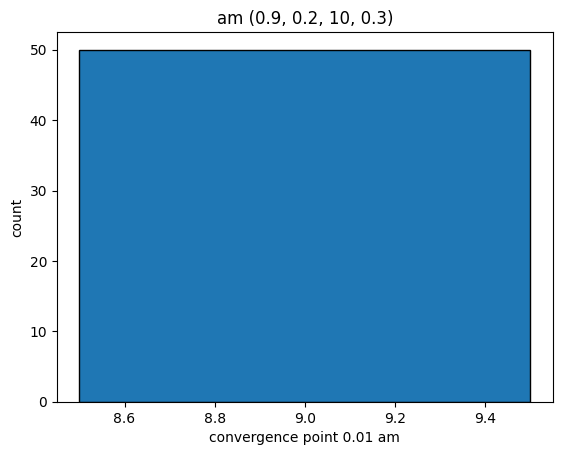

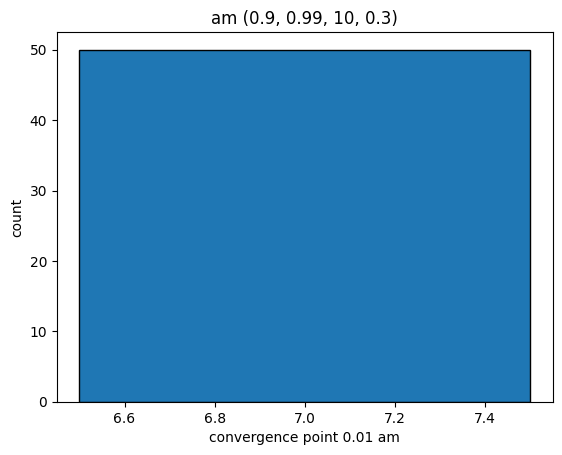

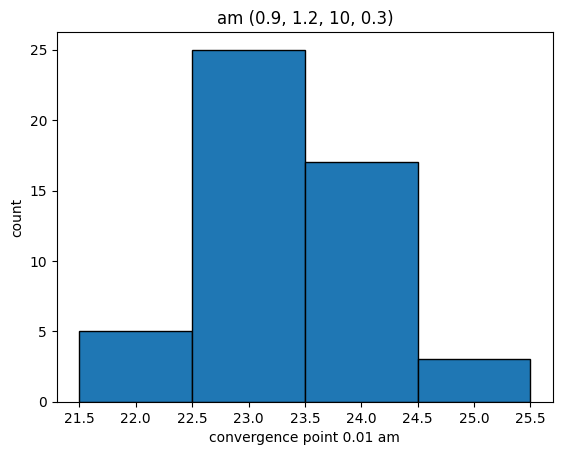

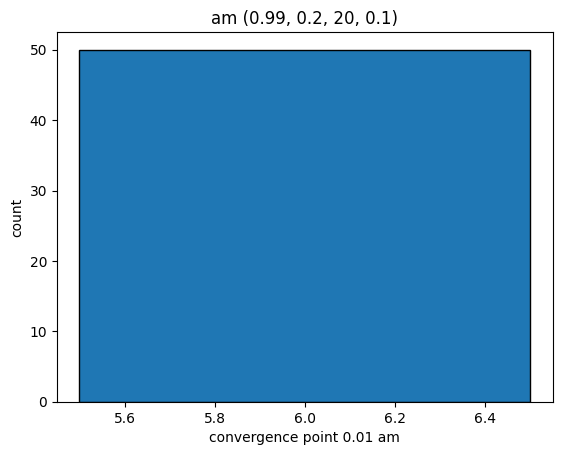

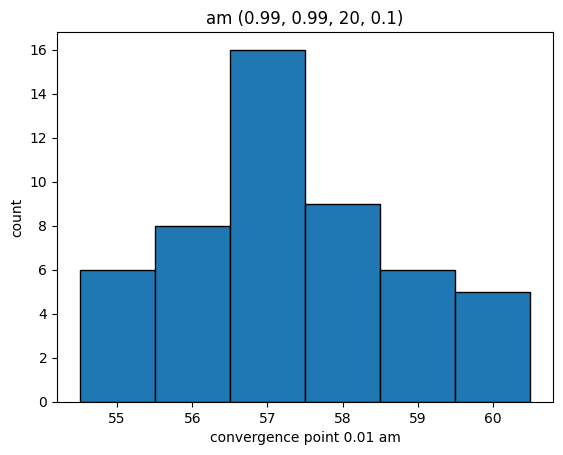

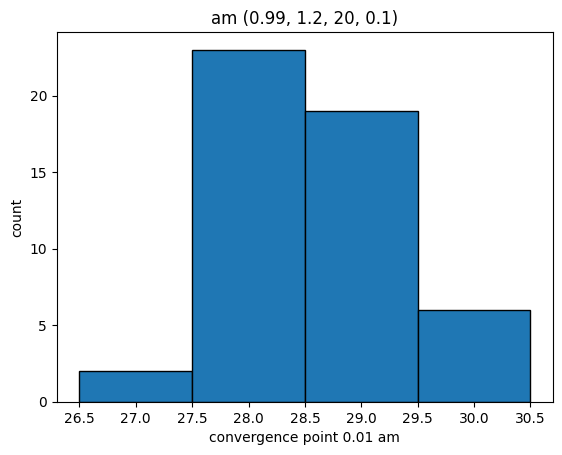

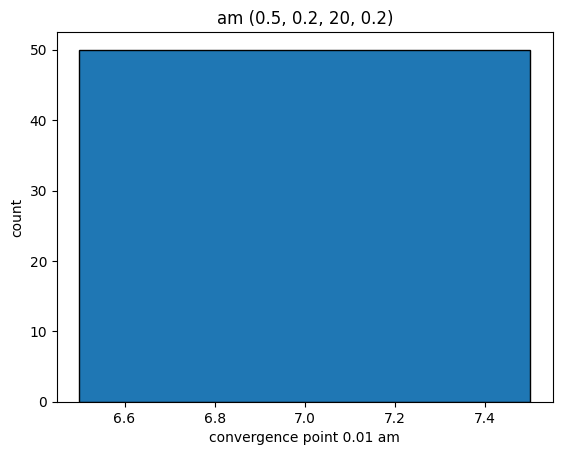

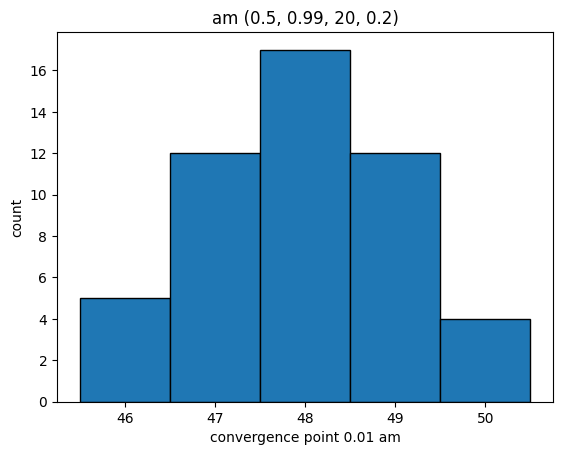

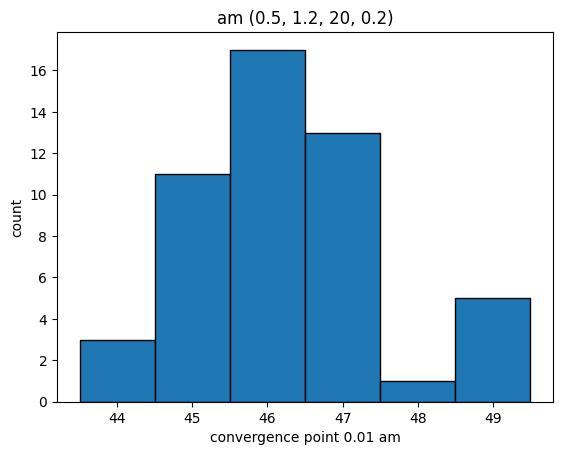

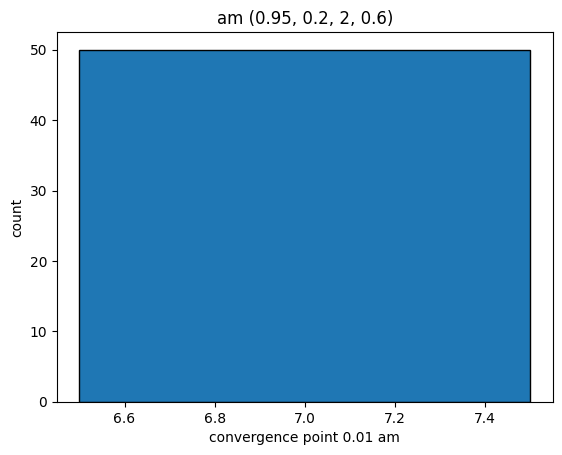

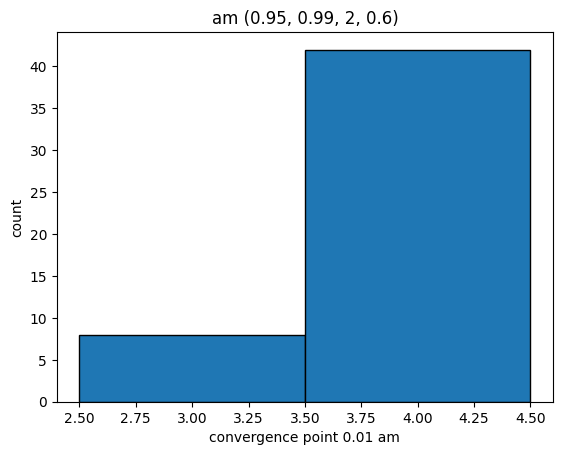

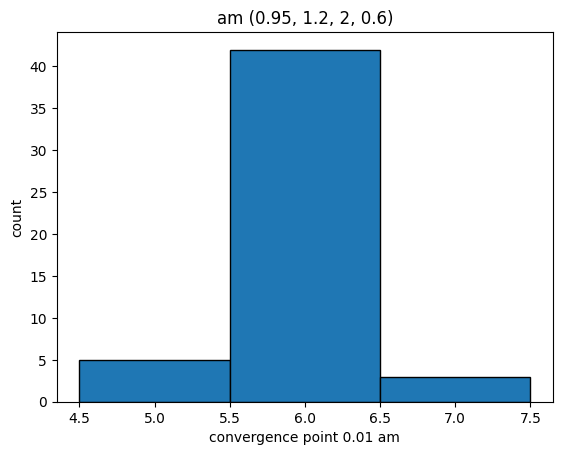

In [104]:
# Appears that all significant variation for added mass is accounted for.
am_wide_variation_cases = []
for idx, quad in enumerate(quads):
  vals = histogram(fixed_prob_lsts[idx],"am", 0.01, ylab = "count", title = f"{quad}")
  if max(vals) - min(vals) > 7:
    am_wide_variation_cases.append(idx)

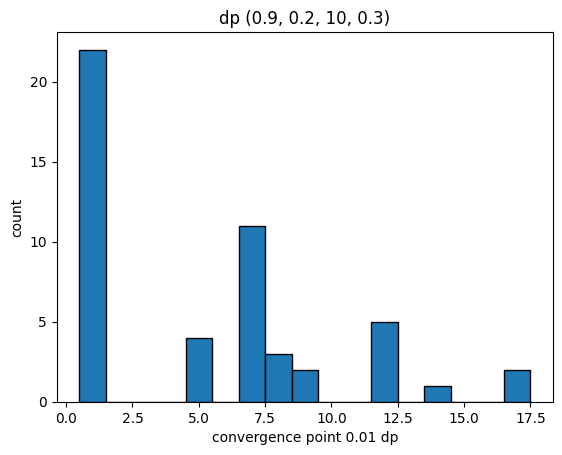

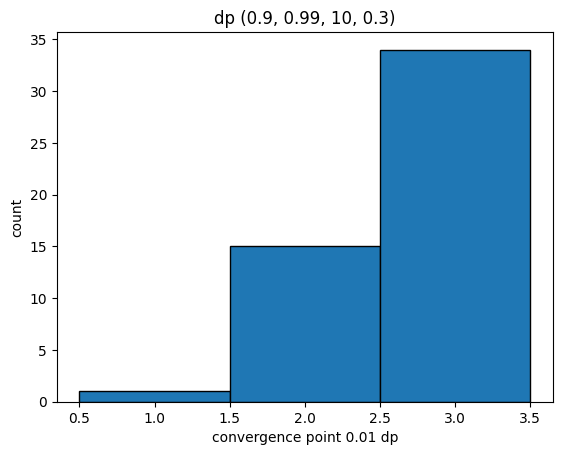

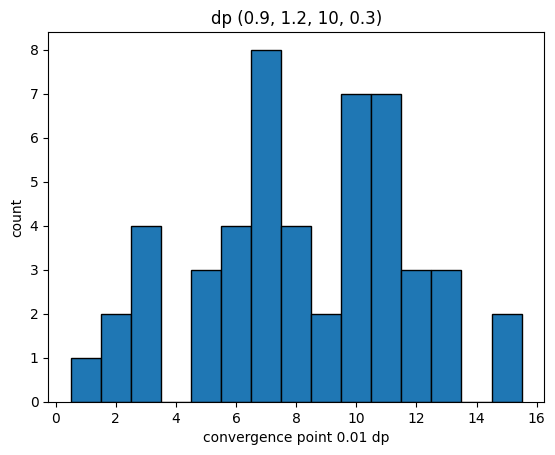

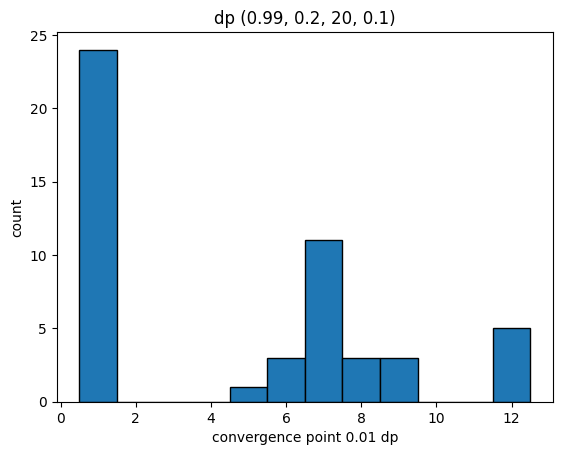

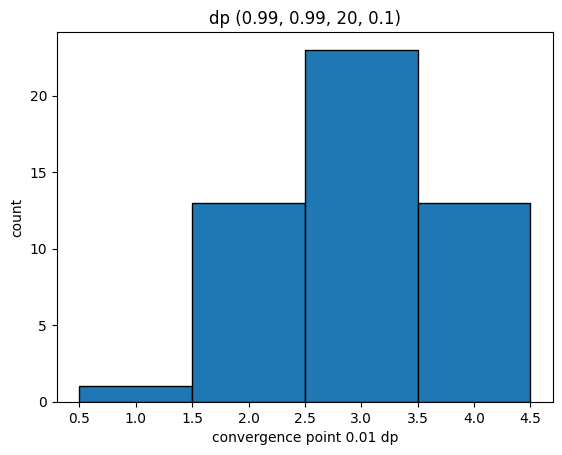

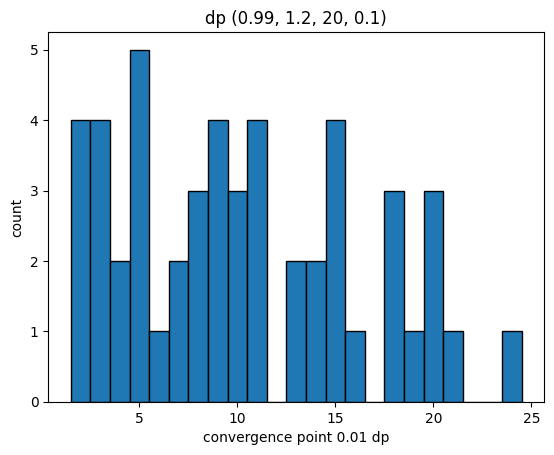

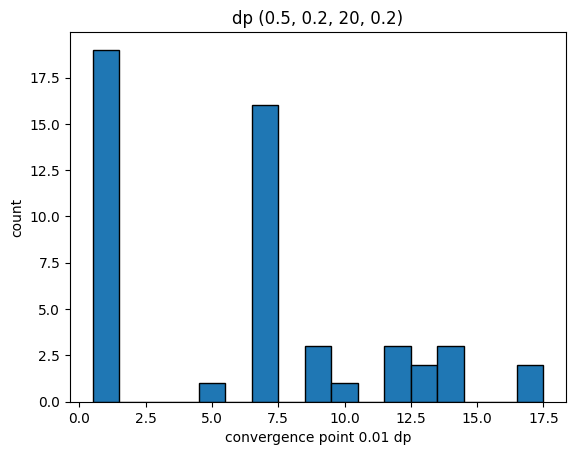

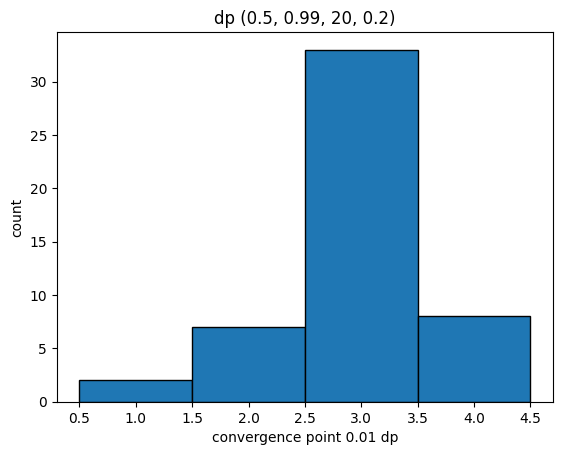

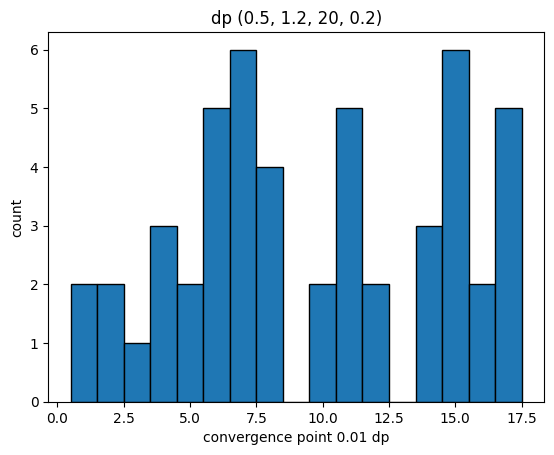

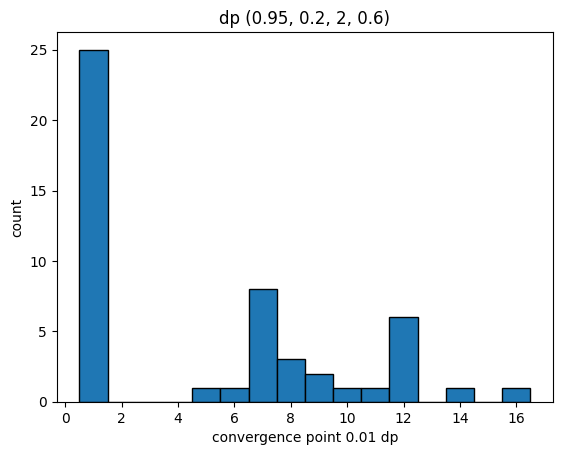

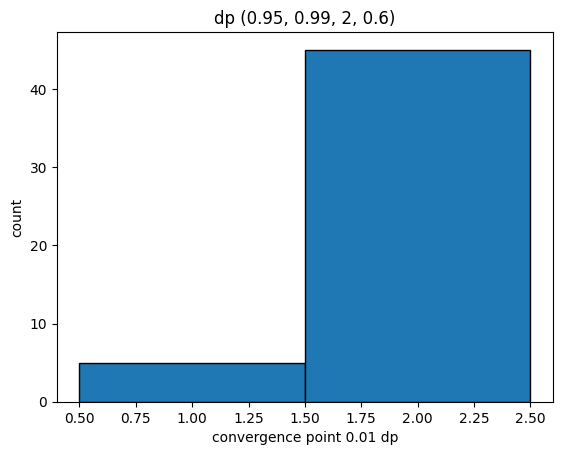

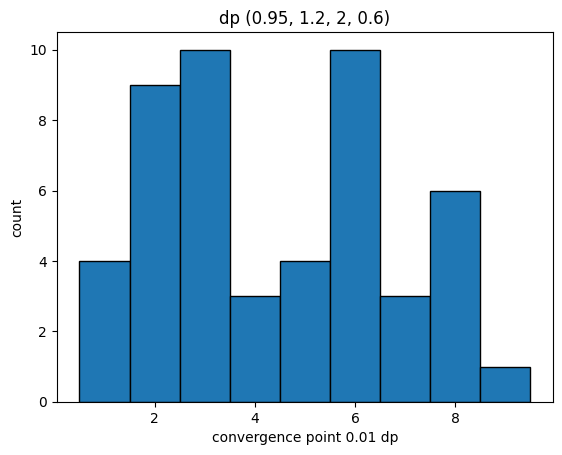

In [ ]:
# Unaccounted for significant damping variation remains.
dp_wide_variation_cases = []
for idx, quad in enumerate(quads):
  vals = histogram(fixed_prob_lsts[idx],"dp", 0.01, ylab = "count", title = f"{quad}")
  if max(vals) - min(vals) > 7:
    dp_wide_variation_cases.append(idx)

In [119]:
def plot_varied_cases(fixed_prob_lsts, idx, hydro):
  subset = fixed_prob_lsts[idx].copy()
  val_func = lambda data: data[data["m0s"][0]]["convergence point 0.01 " + hydro]
  subset.sort(key = val_func)
  vals = [val_func(data) for data in subset]
  # filter_and_plot_shapes(subset, lambda data_dict, m0 : True, 
  #                       lambda data_dict, m0 : get_plasma_color(data_dict[m0]["convergence point 0.01 " + hydro], min_value = min(vals), max_value=max(vals)),
  #                       ppr = 10, figsize_per_plot = (2, 2))
  # xs = [data_dict["m0s"][0] *  (data_dict["h"] - data_dict["d"][1]) for data_dict in subset]
  xs = [data_dict["m0s"][0] * (data_dict["a"][2] - data_dict["a"][1]) for data_dict in subset]
  ys = [data_dict[data_dict["m0s"][0]]["convergence point 0.01 " + hydro] for data_dict in subset]
  plt.plot(xs, ys)
  plt.xlabel("m0 * (h-d)")
  plt.ylabel("convergence point")
  plt.show()

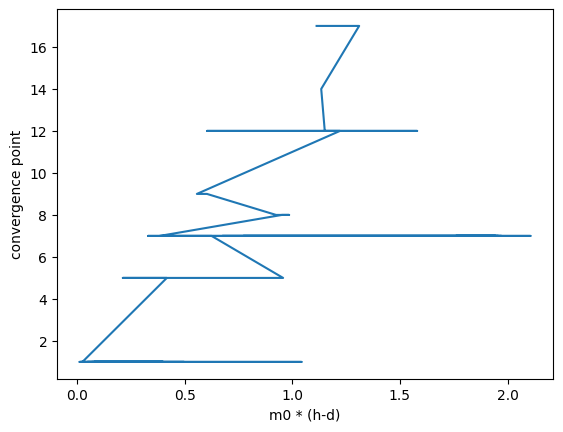

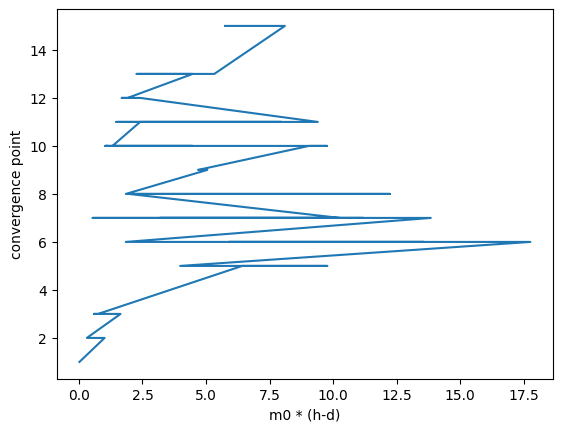

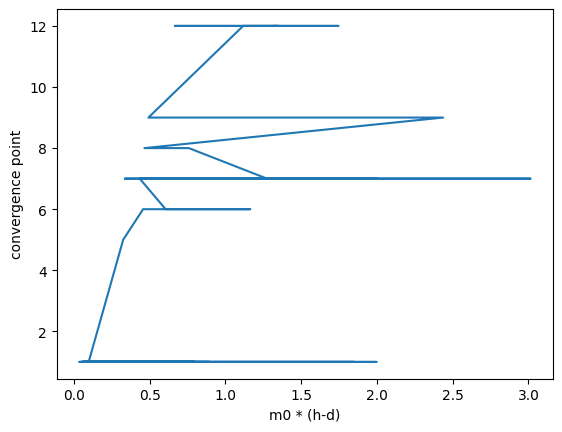

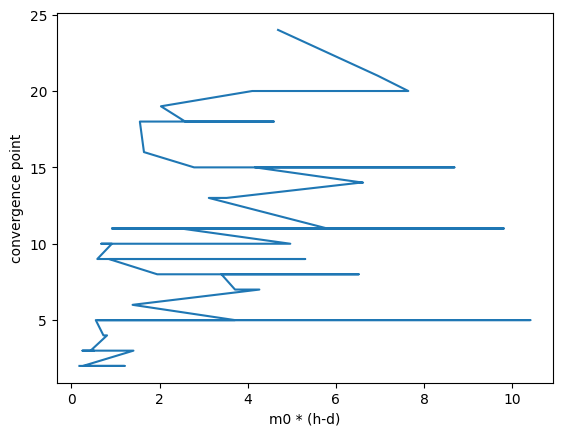

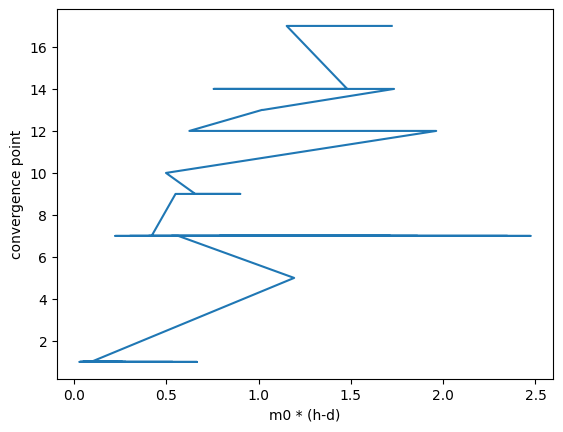

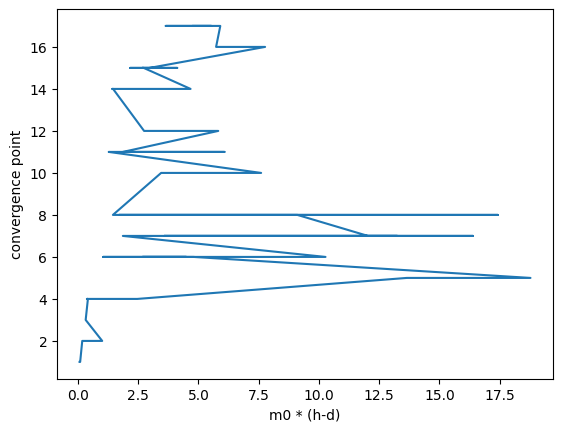

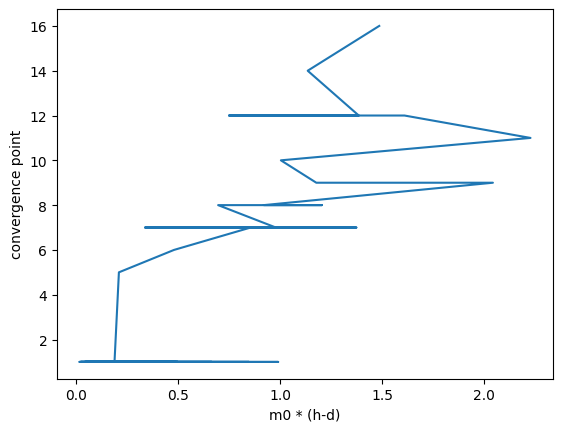

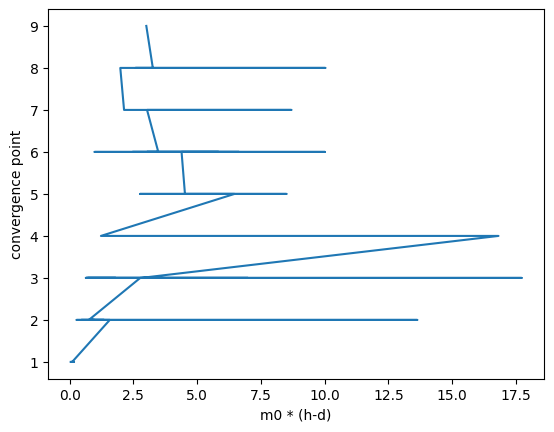

In [120]:
for idx in dp_wide_variation_cases:
  plot_varied_cases(fixed_prob_lsts, idx, "dp")

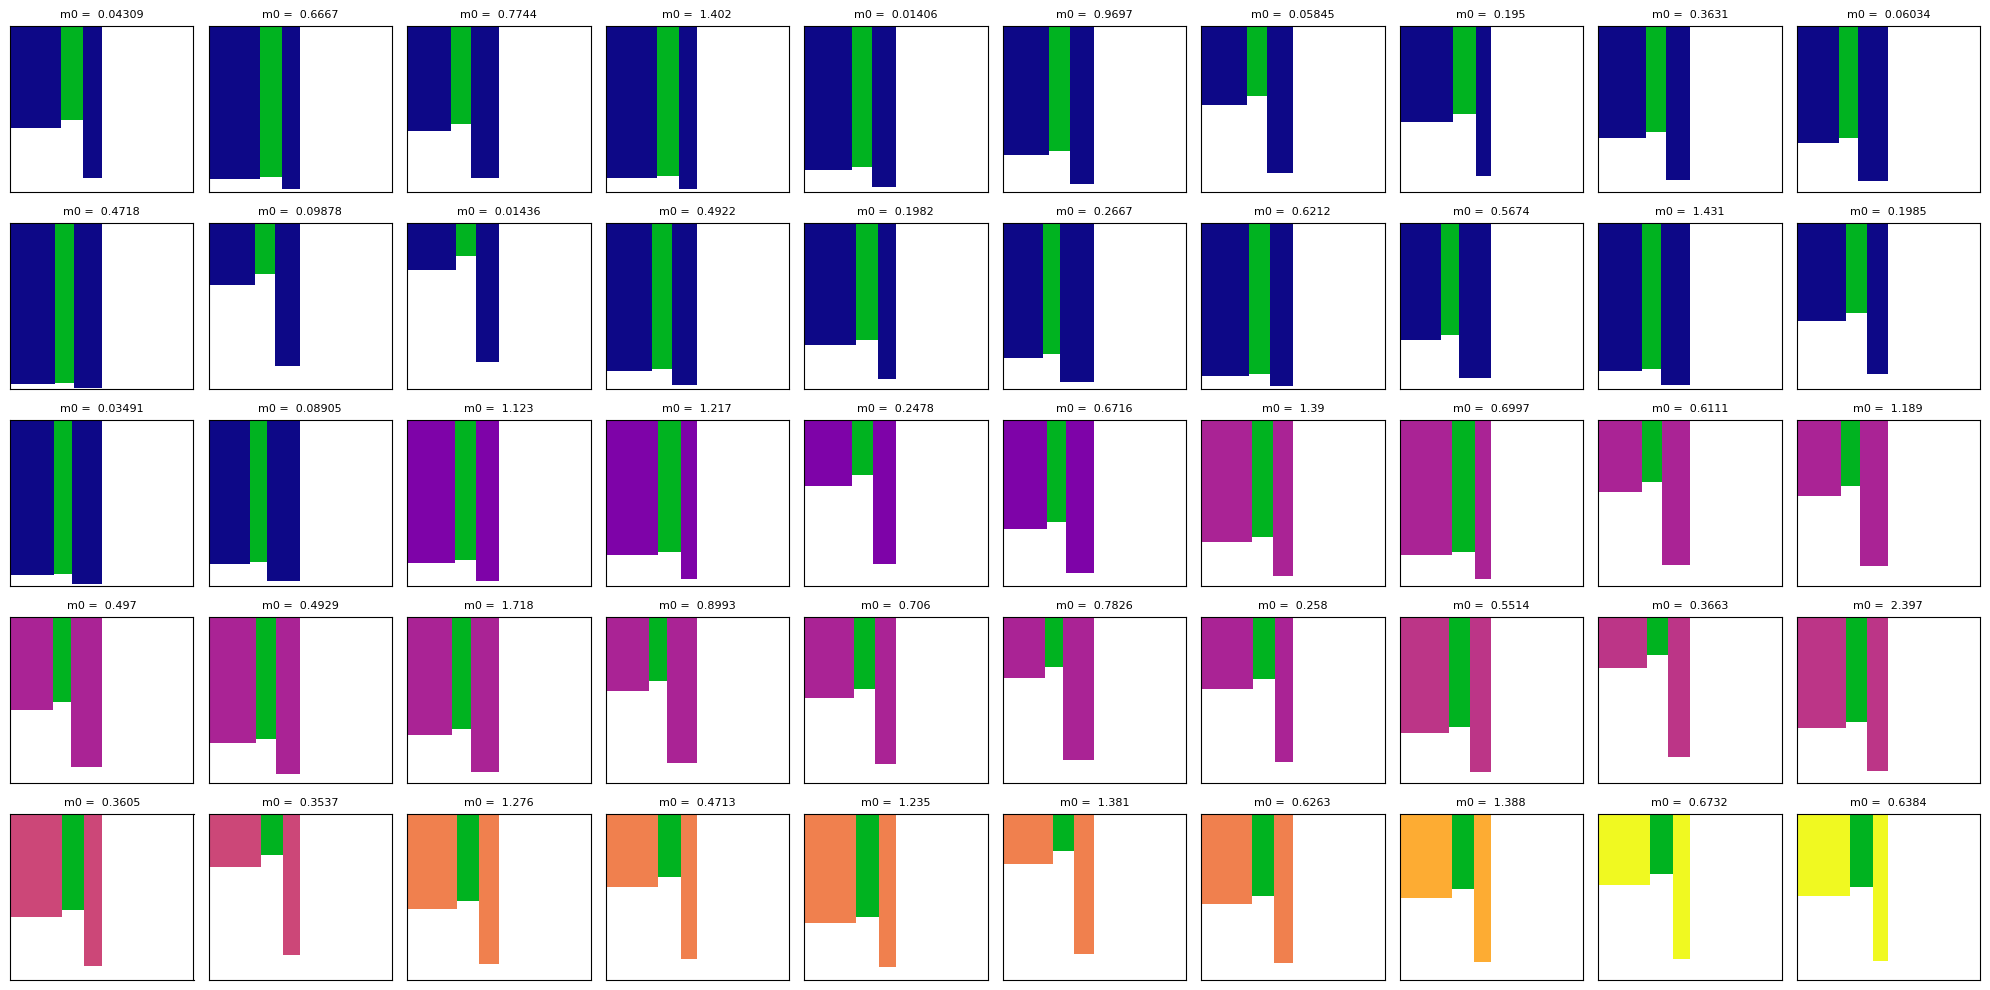

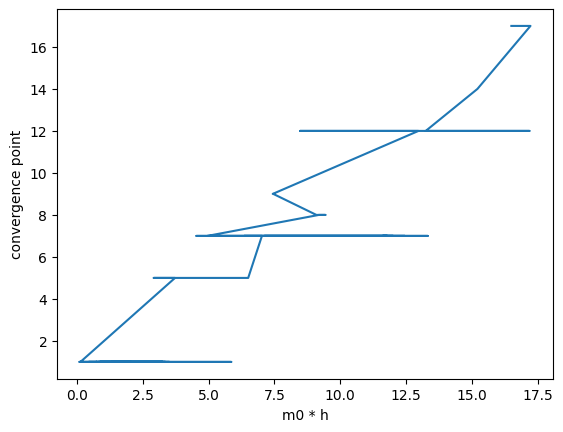

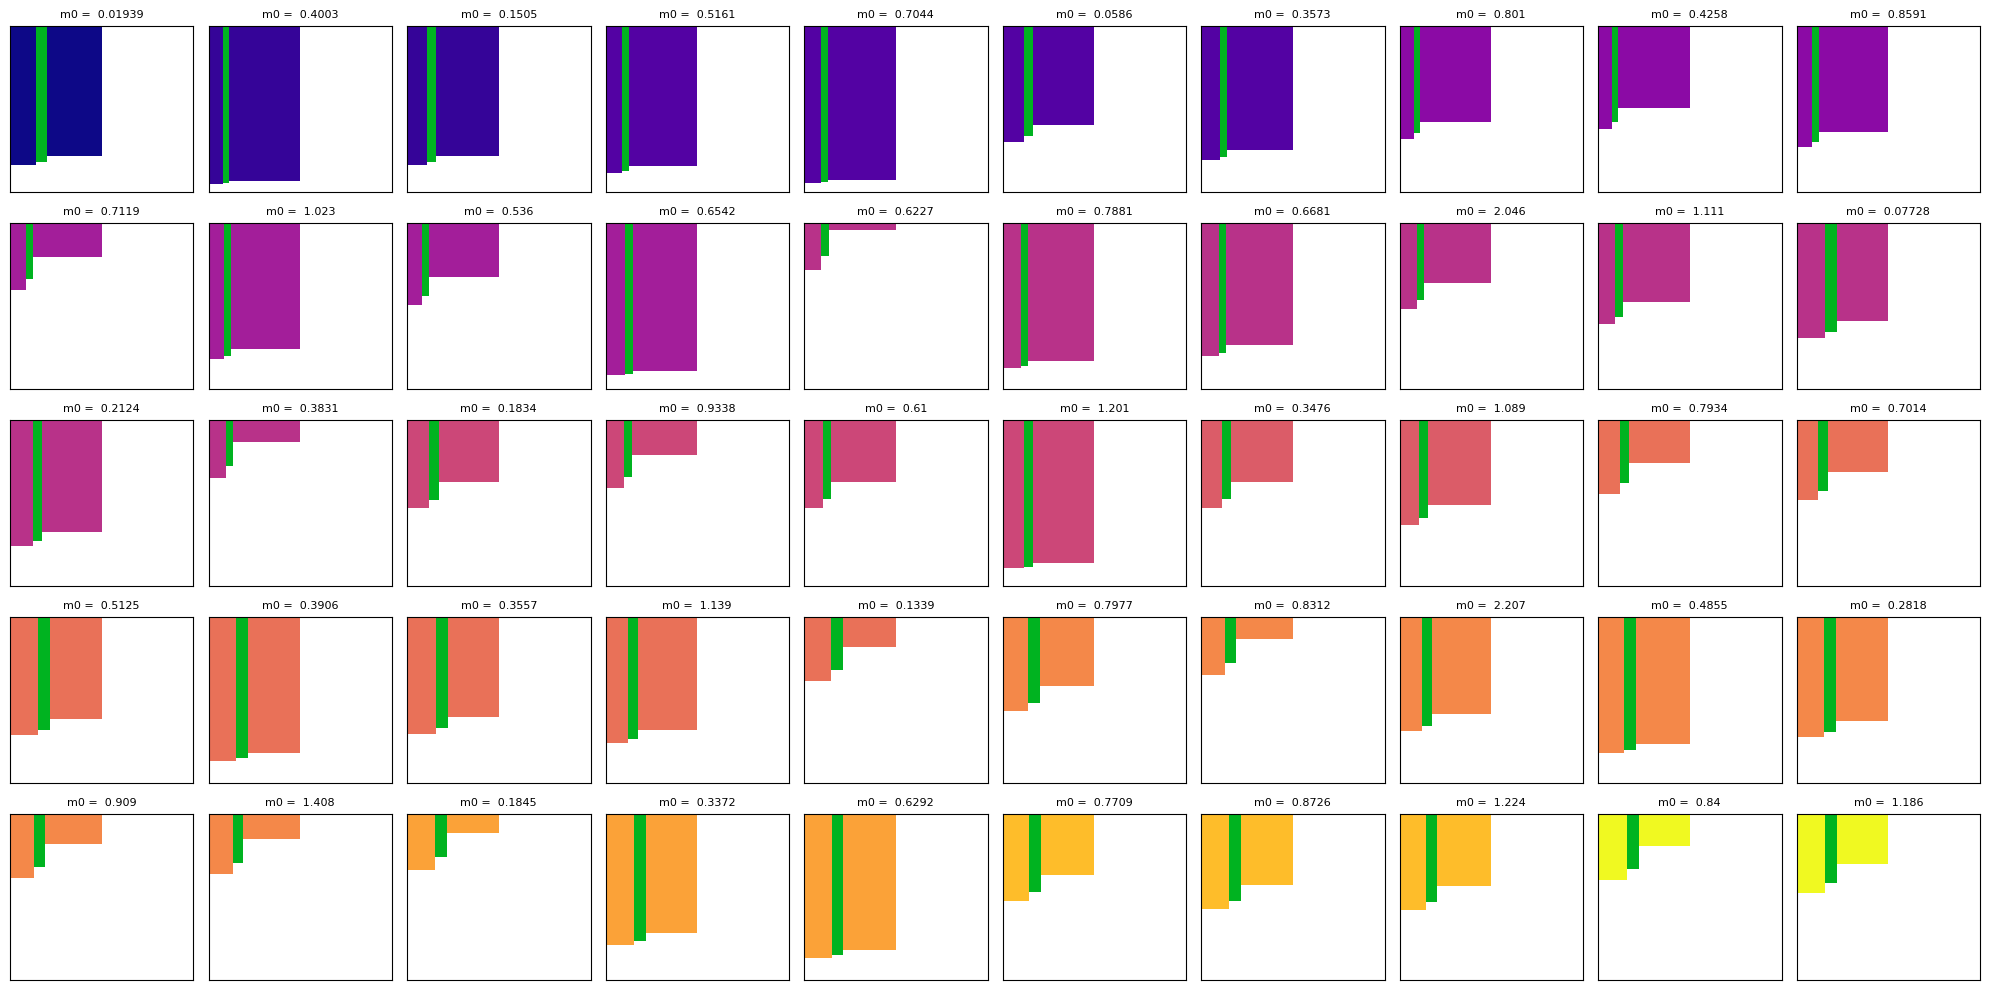

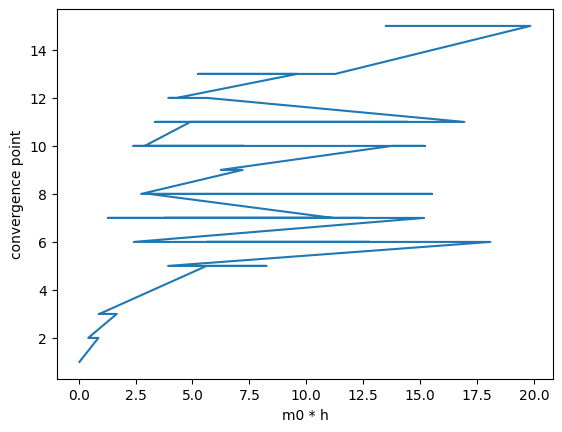

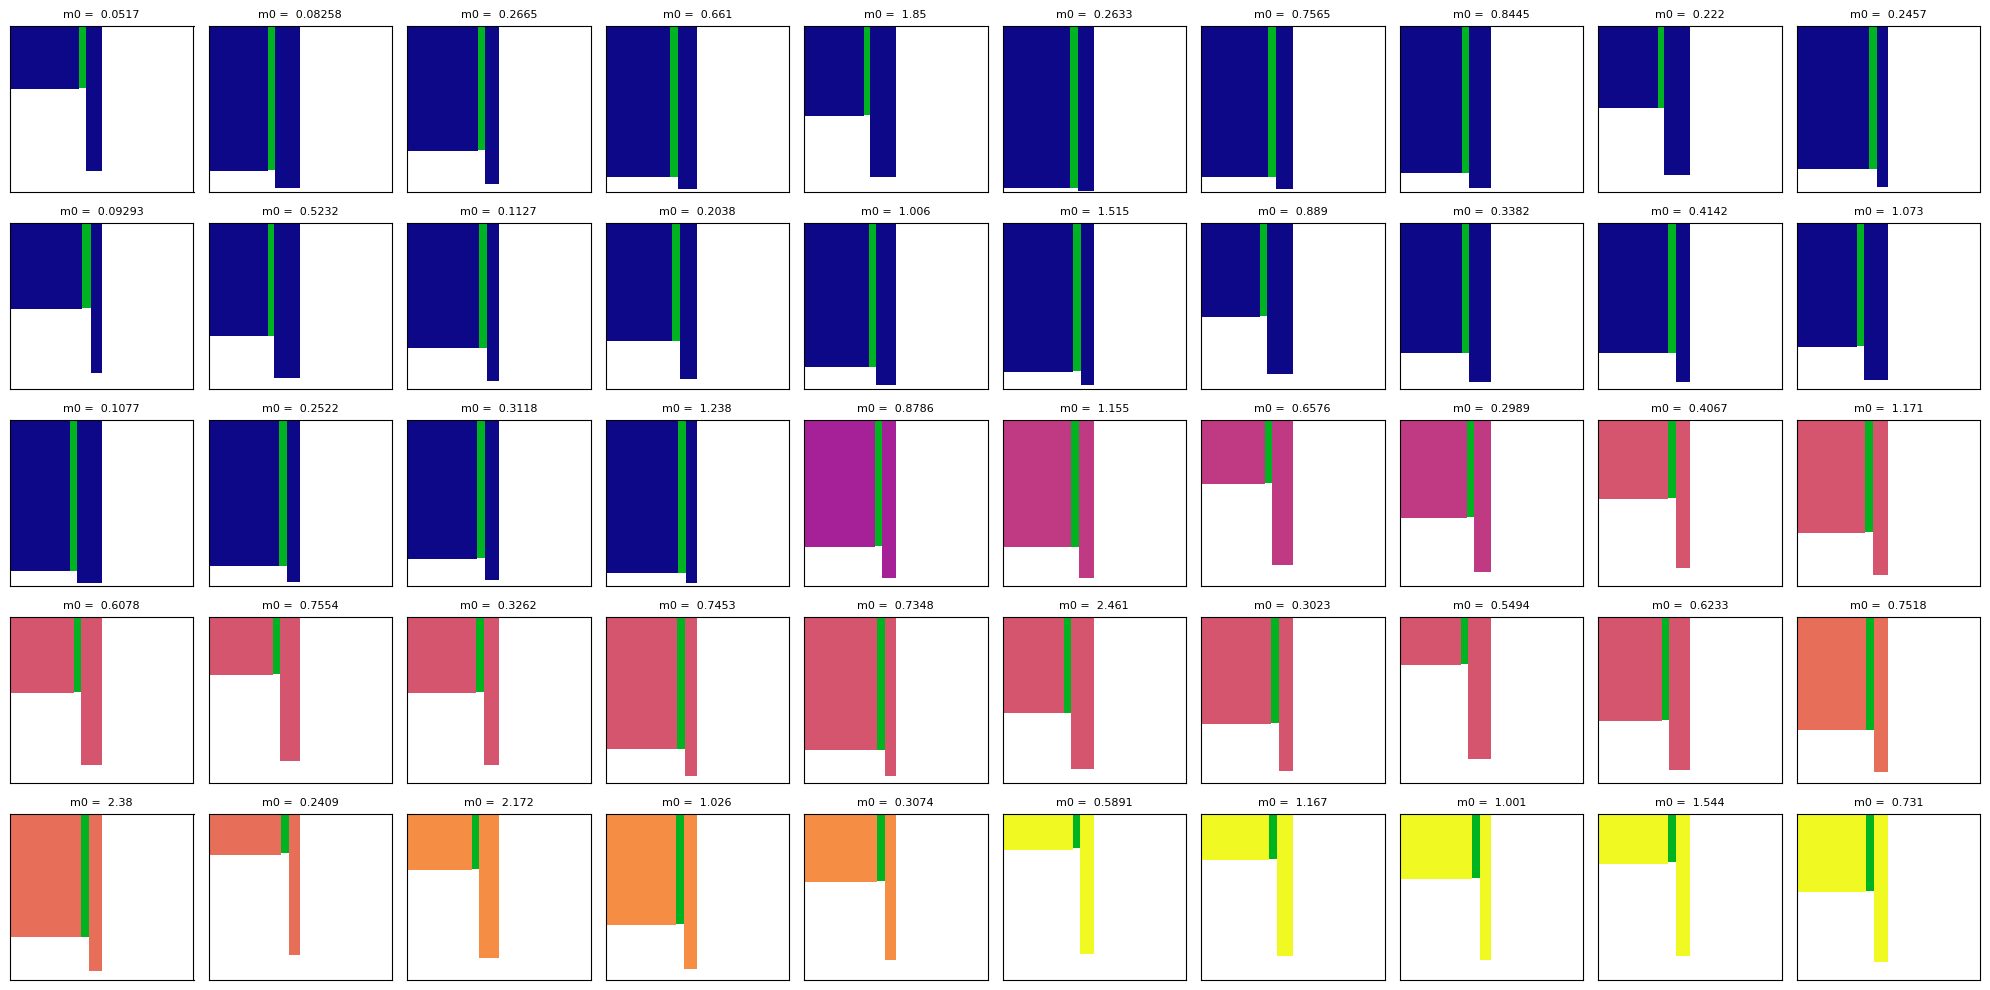

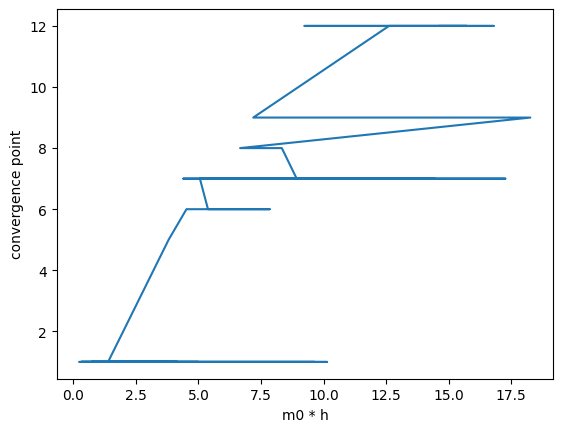

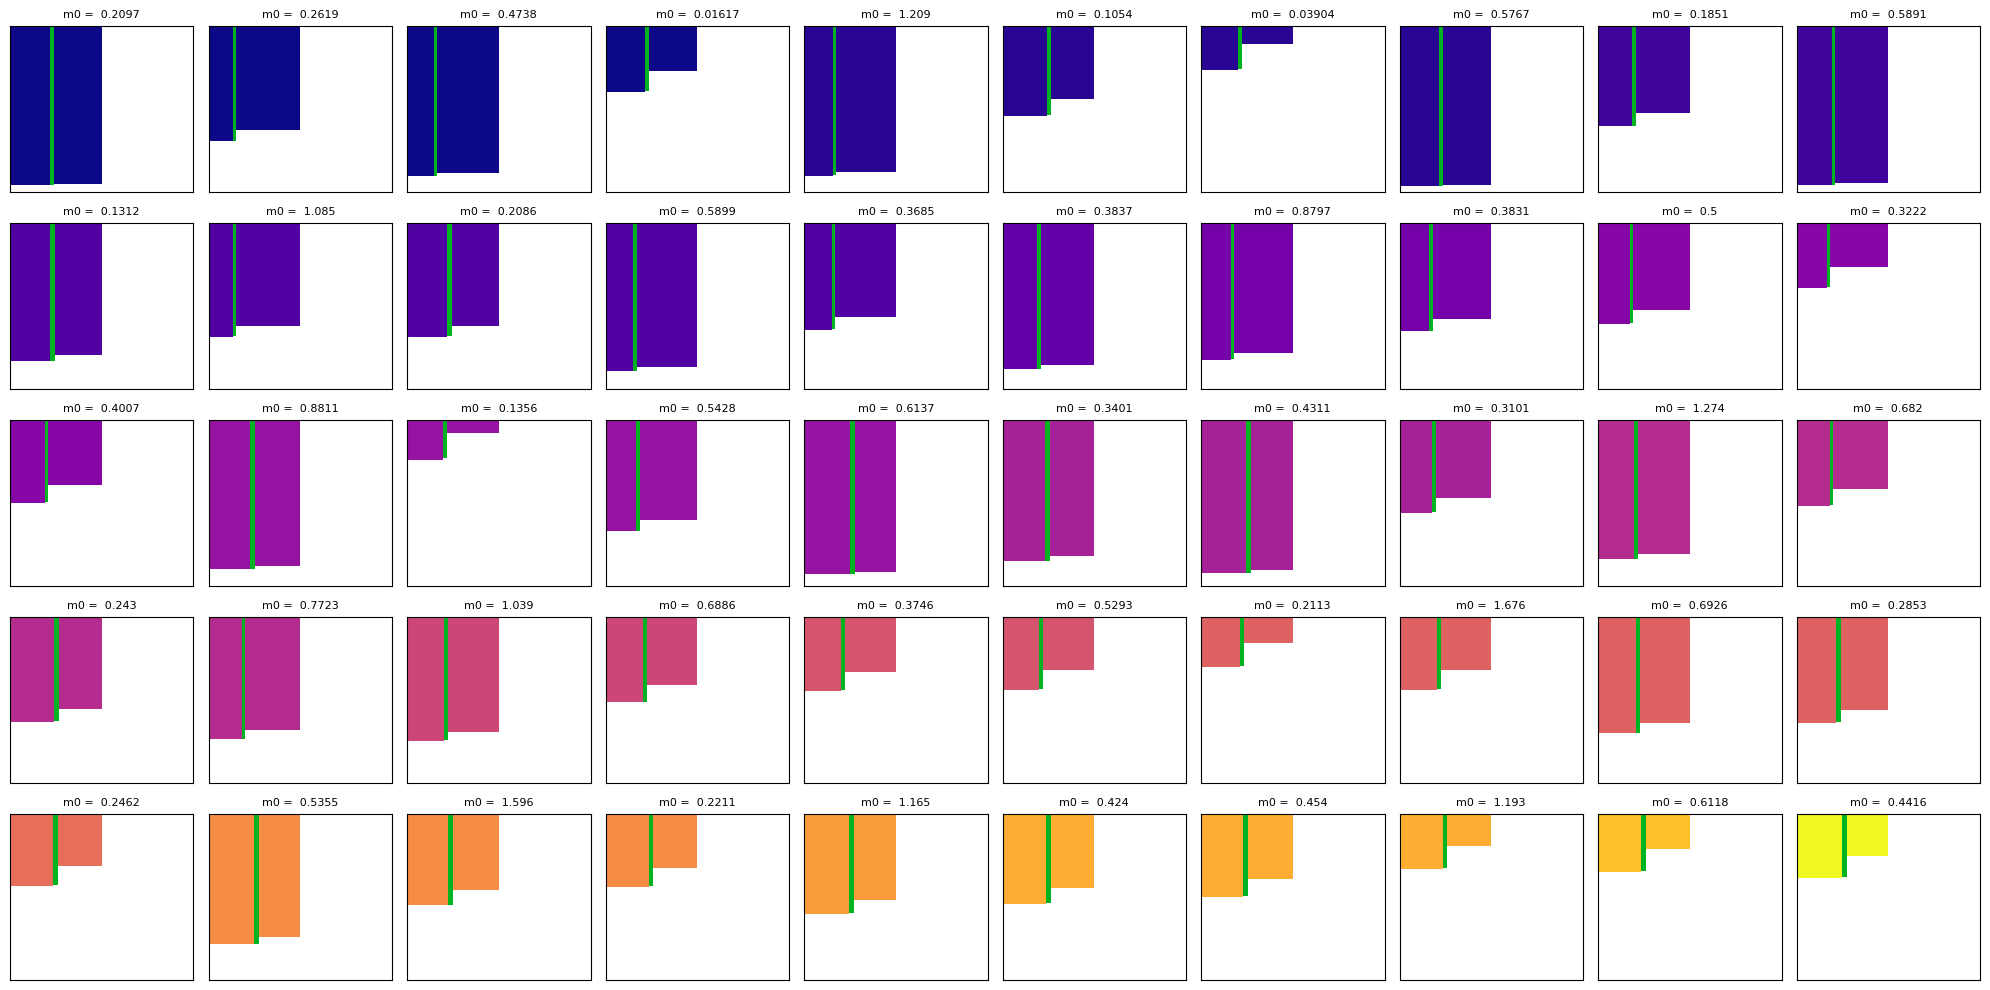

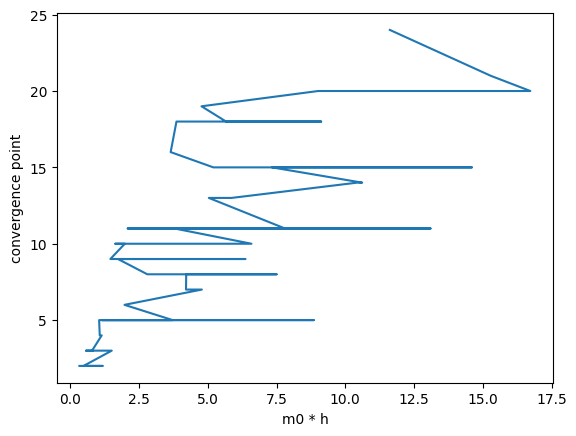

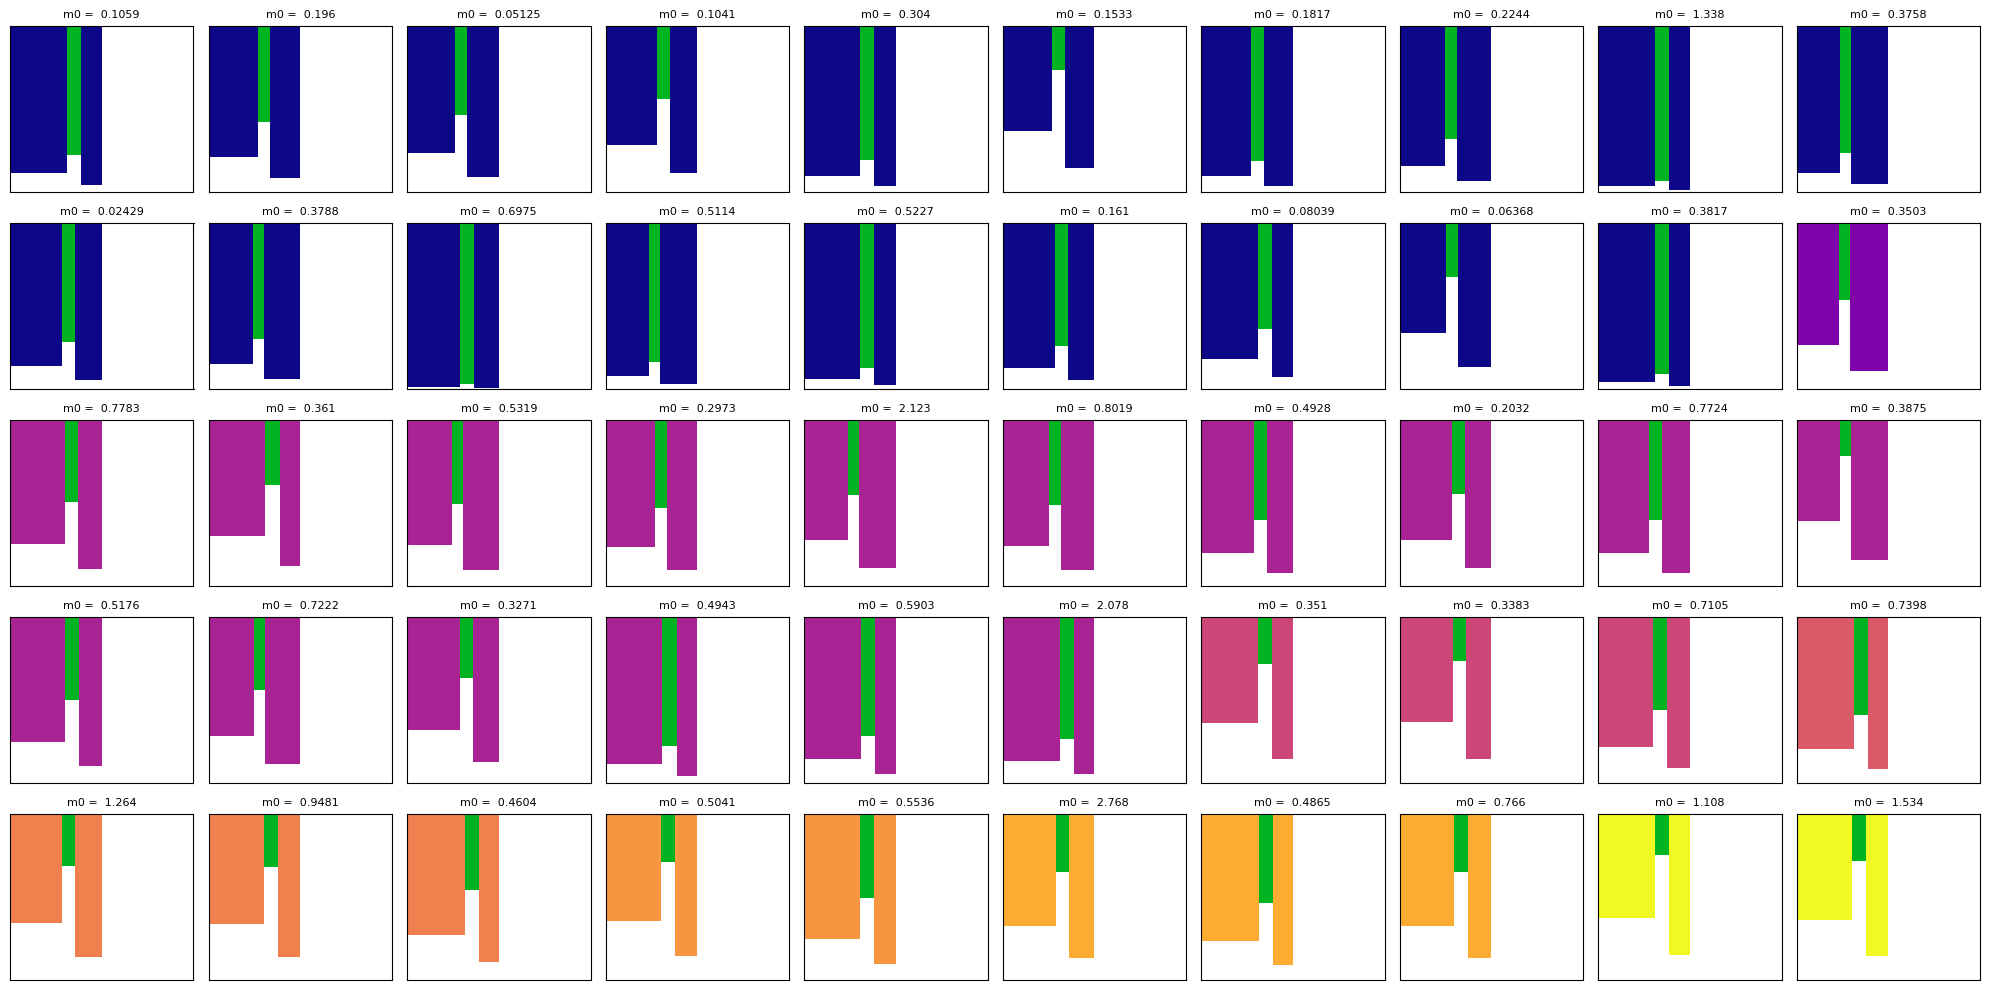

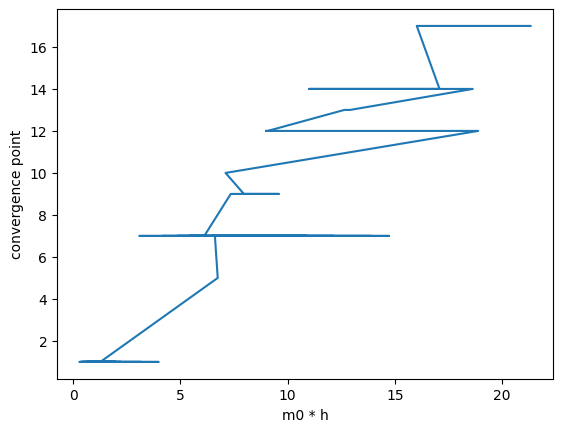

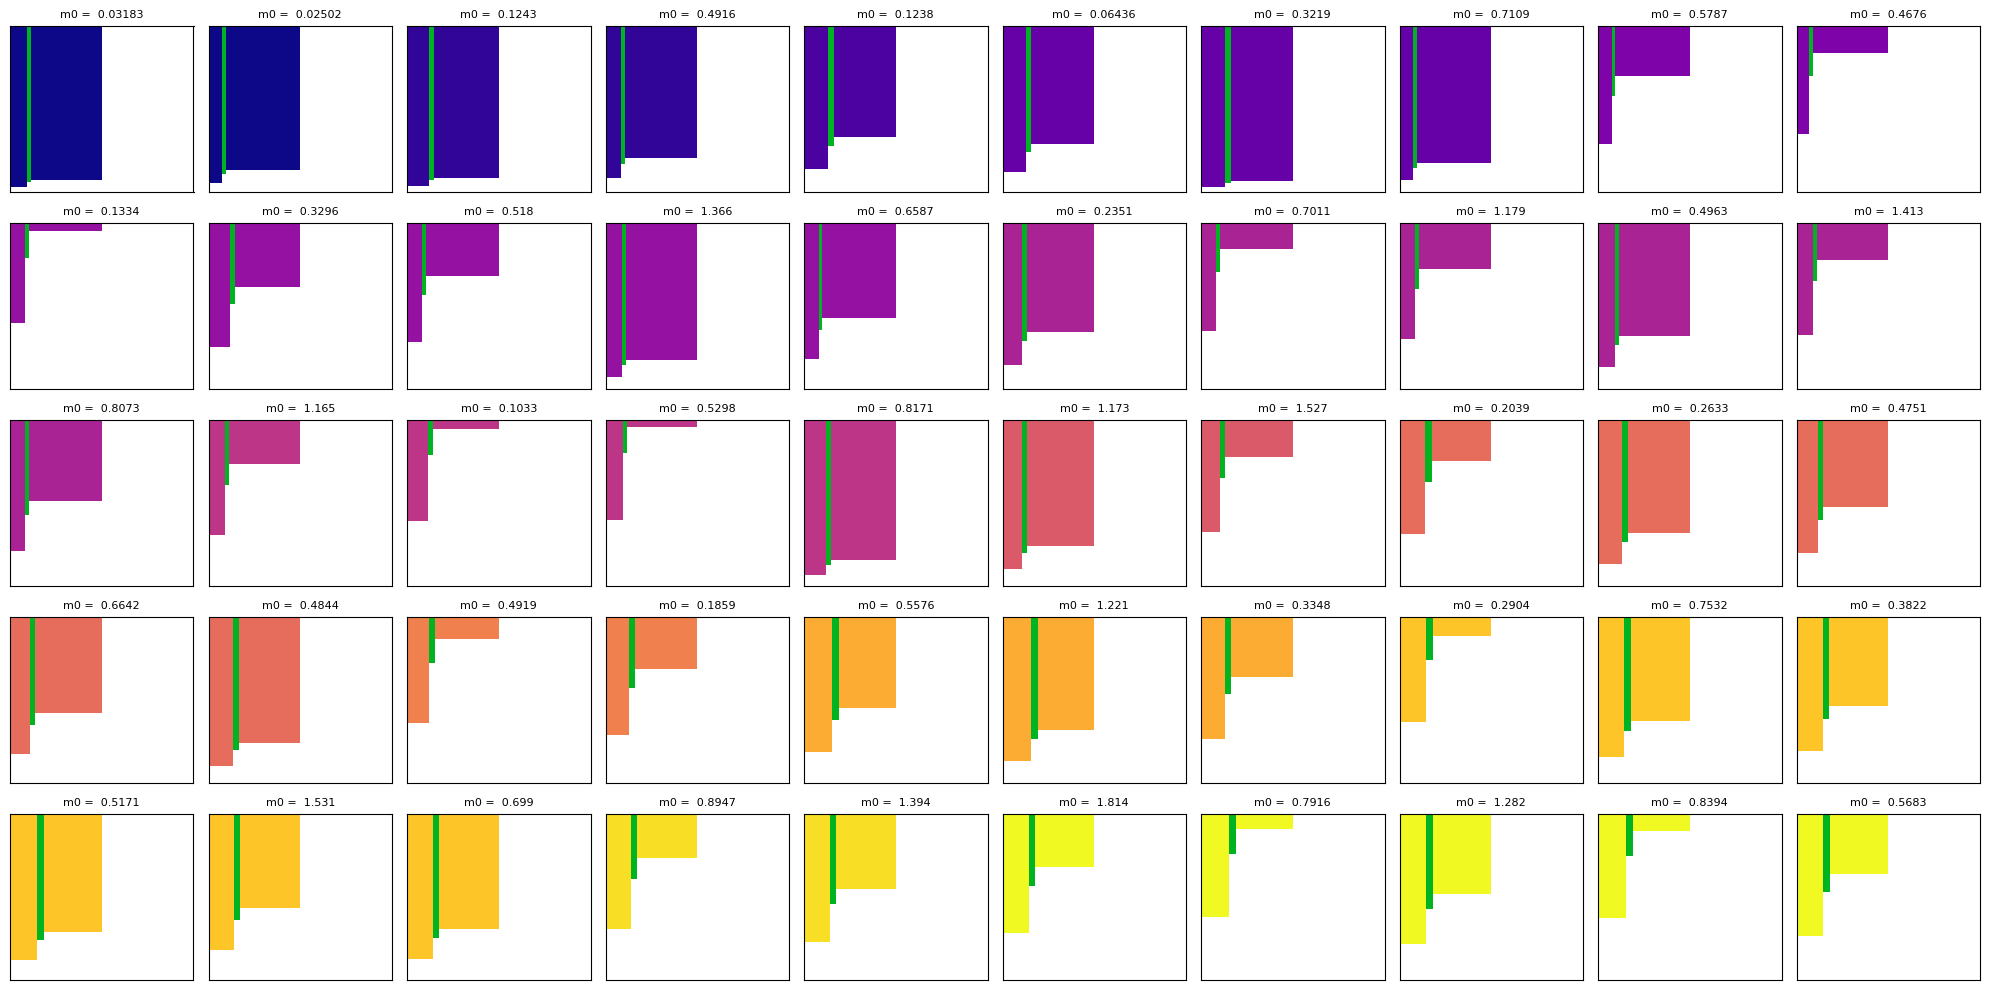

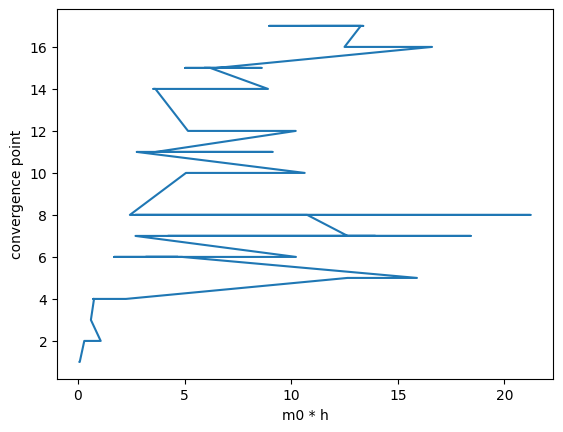

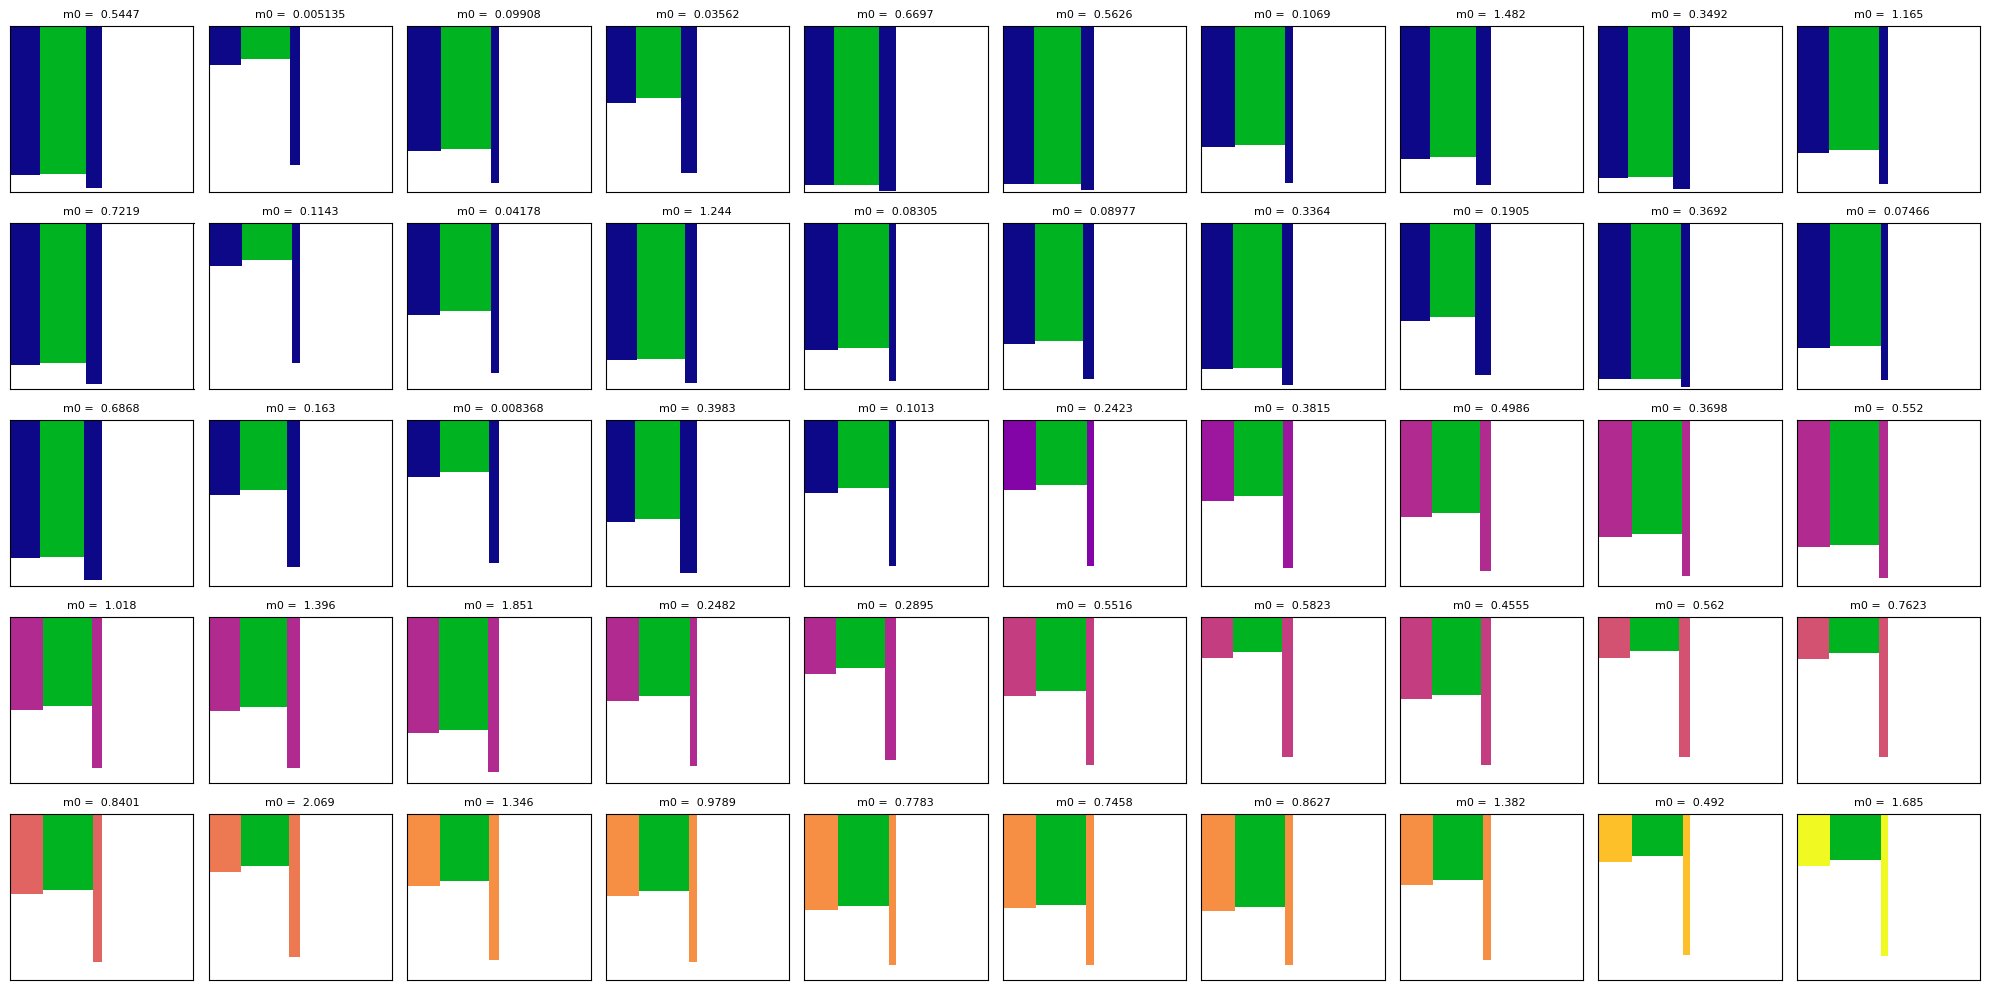

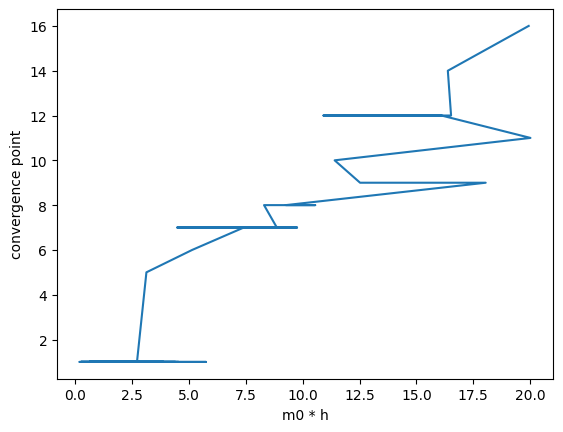

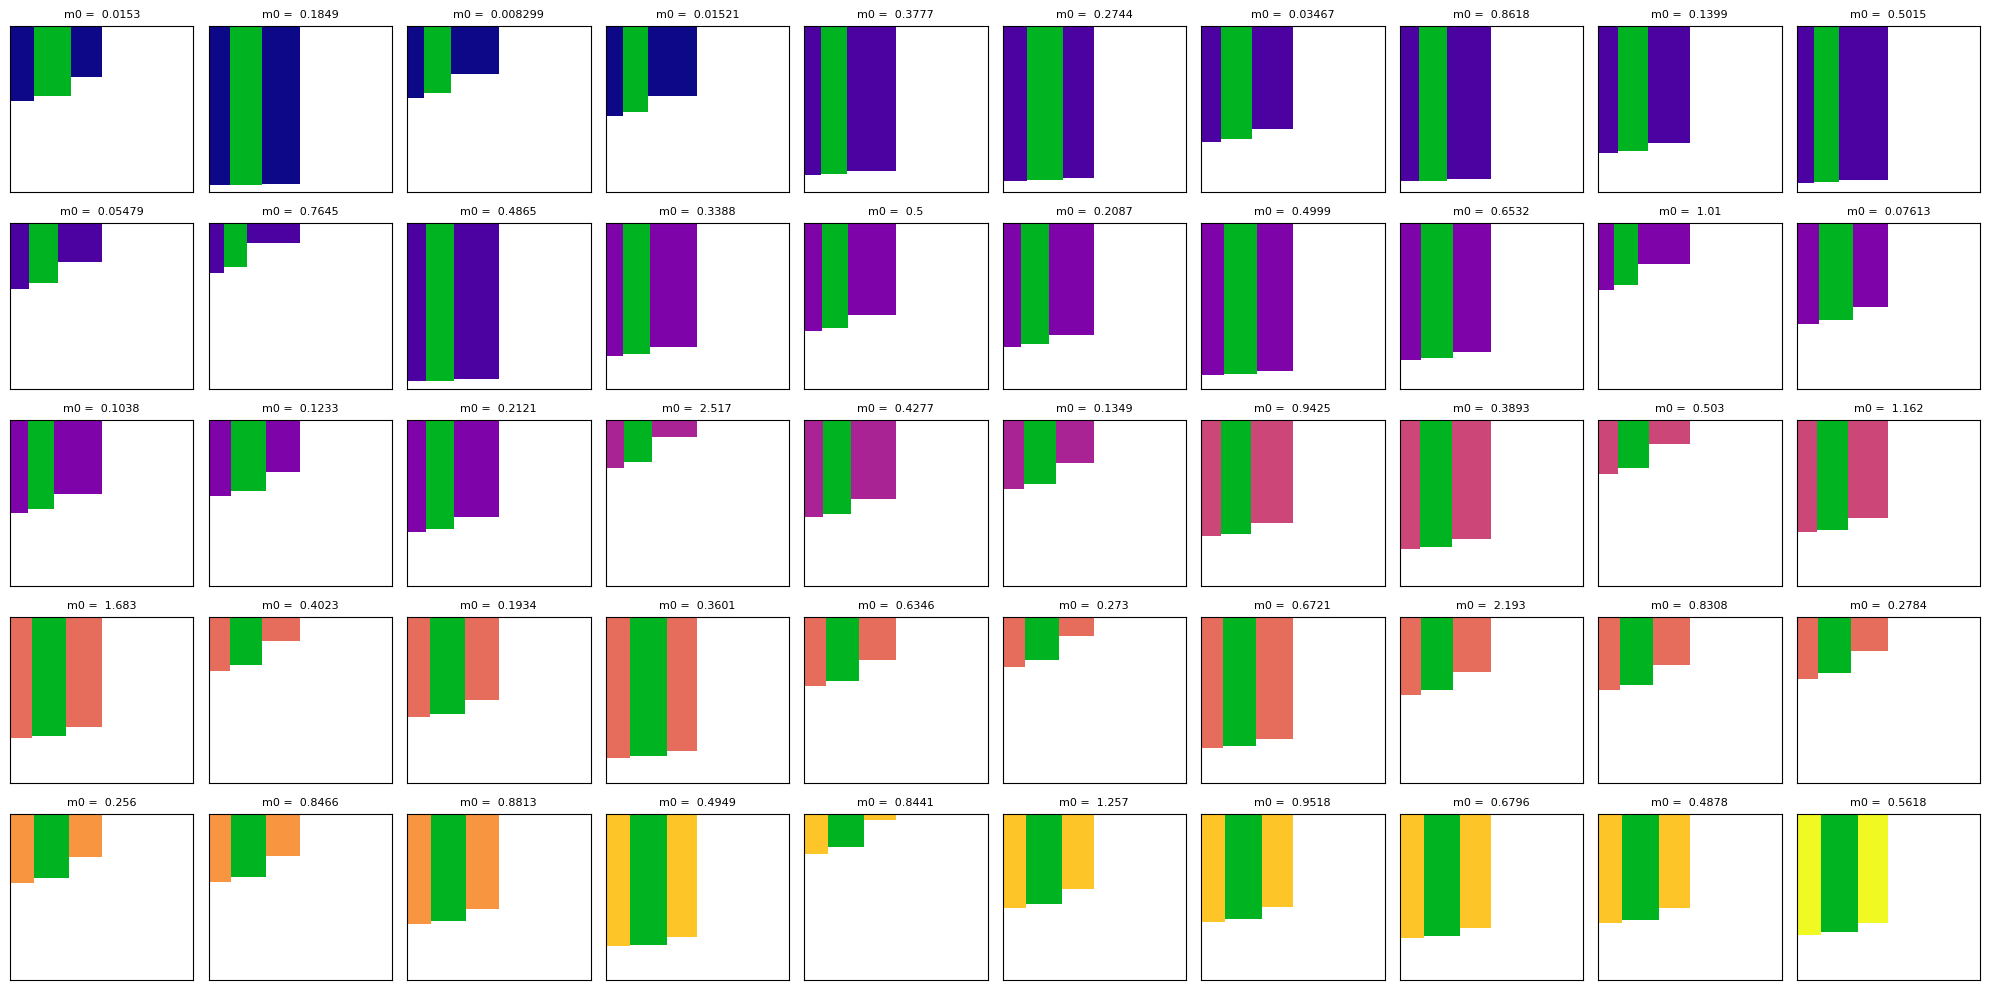

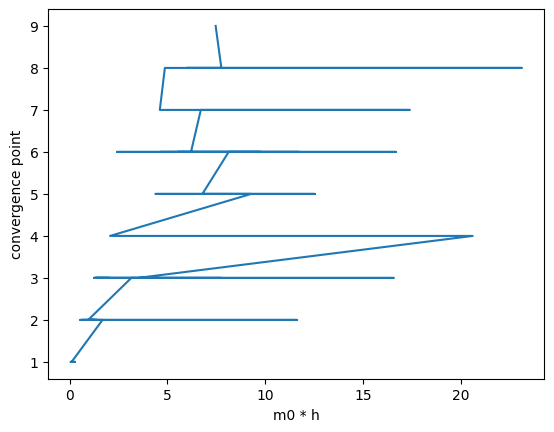

In [23]:
for idx in dp_wide_variation_cases:
  plot_varied_cases(fixed_prob_lsts, idx, "dp")

In [ ]:
file2 = "predetermined_2.pkl"

# Vary components individually or in pairs.
predet_left_ratios = [0.5, 0.99, 1.2]
predet_right_ratios = [0.5, 0.99, 1.2]
predet_hmdrs = [1, 2]
predet_rad_ratios = [0.05, 0.1, 0.15]

left_ratios = list(np.linspace(0.1, 0.8, 8)) + list(np.linspace(0.9, 1.1, 21)) + list(np.linspace(1.2, 2, 9))
right_ratios = list(np.linspace(0.1, 0.8, 8)) + list(np.linspace(0.9, 1.1, 21)) + list(np.linspace(1.2, 2, 9))
hmdrs = list(np.linspace(2, 20, 10))
rad_ratios = list(np.linspace(0.01, 0.1, 10)) + list(np.linspace(0.2, 0.6, 9))

# all_data = {"(h-d)/radwidth" : [],
#             "rad ratio" : [],
#             "height ratios" : []}

fixed_for_hmdr = [(left_r, right_r, rad_r) for left_r in predet_left_ratios
                  for right_r in predet_right_ratios for rad_r in predet_rad_ratios] # size = 27
fixed_for_radr = [(left_r, right_r, hmdr) for left_r in predet_left_ratios
                  for right_r in predet_right_ratios for hmdr in predet_hmdrs]
fixed_for_heightr = [(20, 0.1)]

def populate_predet_d_a(h, left_ratio, right_ratio, hmdr, rad_ratio):
  hmd1 = 10
  hmd0 = left_ratio * hmd1
  hmd2 = right_ratio * hmd1

  radwidth1 = hmd1/hmdr
  radwidth0 = radwidth1 * (1/rad_ratio - 1)
  radwidth2 = hmd2/3
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  return d, a

def solve_and_store(h, m0, mk, prob, nmk_max, d, a, region = 1):
  info = {"h" : h,
          "d" : d,
          "a" : a,
          "region" : region,
          "m0s" : [m0]}
  print(info)
  swap_vals(prob, d, a)
  return merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))

h = 30
m0 = 1

big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
heaving = [0, 1, 0]
rho = 1023

# prob = ConvergenceProblemI(h, [1,1,1], [1,2,3], heaving, NMK, m0, rho)
# mk = prob.m_k

# for triple in fixed_for_hmdr:
#   for hmdr in hmdrs:
#     d, a = populate_predet_d_a(h, triple[0], triple[1], hmdr, triple[2])
#     data_dict = solve_and_store(h, m0, mk, prob, nmk_max, d, a)
#     all_data["(h-d)/radwidth"].append(data_dict)
#   update_data_file(all_data, file2)
#   print("Finished an hmdr triple.")

# for triple in fixed_for_radr:
#   for rad_ratio in rad_ratios:
#     d, a = populate_predet_d_a(h, triple[0], triple[1], triple[2], rad_ratio)
#     data_dict = solve_and_store(h, m0, mk, prob, nmk_max, d, a)
#     all_data["rad ratio"].append(data_dict)
#   update_data_file(all_data, file2)
#   print("Finished a rad ratio triple.")

# for tup in fixed_for_heightr: # just 1
#   for left_ratio in left_ratios:
#     for right_ratio in right_ratios:
#       d, a = populate_predet_d_a(h, left_ratio, right_ratio, tup[0], tup[1])
#       data_dict = solve_and_store(h, m0, mk, prob, nmk_max, d, a)
#       all_data["height ratios"].append(data_dict)
#     update_data_file(all_data, file2)
#     print("Finished a right ratio.")

# # Add better generating data for rad_ratio
# all_data = open_pkl_file(file2)
# rad_ratios = list(np.linspace(0.01, 0.15, 15))
# predet_left_ratios = [0.2, 0.8, 0.9]
# predet_right_ratios = [0.5, 0.99, 1.2]
# prob = ConvergenceProblemI(h, [1,1,1], [1,2,3], heaving, NMK, m0, rho)
# mk = prob.m_k
# fixed_for_radr = [(left_r, right_r, 20) for left_r in predet_left_ratios for right_r in predet_right_ratios]
# for triple in fixed_for_radr:
#   for rad_ratio in rad_ratios:
#     d, a = populate_predet_d_a(h, triple[0], triple[1], triple[2], rad_ratio)
#     data_dict = solve_and_store(h, m0, mk, prob, nmk_max, d, a)
#     all_data["rad ratio"].append(data_dict)
#   update_data_file(all_data, file2)
#   print("Finished a rad ratio triple.")


{'h': 30, 'd': [28.0, 20, 25.0], 'a': [np.float64(49.5), np.float64(50.0), np.float64(51.666666666666664)], 'region': 1, 'm0s': [1]}
{'h': 30, 'd': [28.0, 20, 25.0], 'a': [np.float64(24.500000000000004), np.float64(25.000000000000004), np.float64(26.66666666666667)], 'region': 1, 'm0s': [1]}
{'h': 30, 'd': [28.0, 20, 25.0], 'a': [np.float64(16.166666666666668), np.float64(16.666666666666668), np.float64(18.333333333333336)], 'region': 1, 'm0s': [1]}
{'h': 30, 'd': [28.0, 20, 25.0], 'a': [np.float64(12.000000000000002), np.float64(12.500000000000002), np.float64(14.166666666666668)], 'region': 1, 'm0s': [1]}
{'h': 30, 'd': [28.0, 20, 25.0], 'a': [np.float64(9.5), np.float64(10.0), np.float64(11.666666666666666)], 'region': 1, 'm0s': [1]}
{'h': 30, 'd': [28.0, 20, 25.0], 'a': [np.float64(7.833333333333334), np.float64(8.333333333333334), np.float64(10.0)], 'region': 1, 'm0s': [1]}
{'h': 30, 'd': [28.0, 20, 25.0], 'a': [np.float64(6.642857142857143), np.float64(7.142857142857143), np.floa

In [52]:
# Extract data and add convergence metrics to the dictionaries
all_data = open_pkl_file(file2)
log_data = {}
for key in all_data.keys():
  generate_convergence_data(all_data[key], [0.01, 0.005])
  log_data[key] = generate_log_data(all_data[key])

(h-d)/radwidth


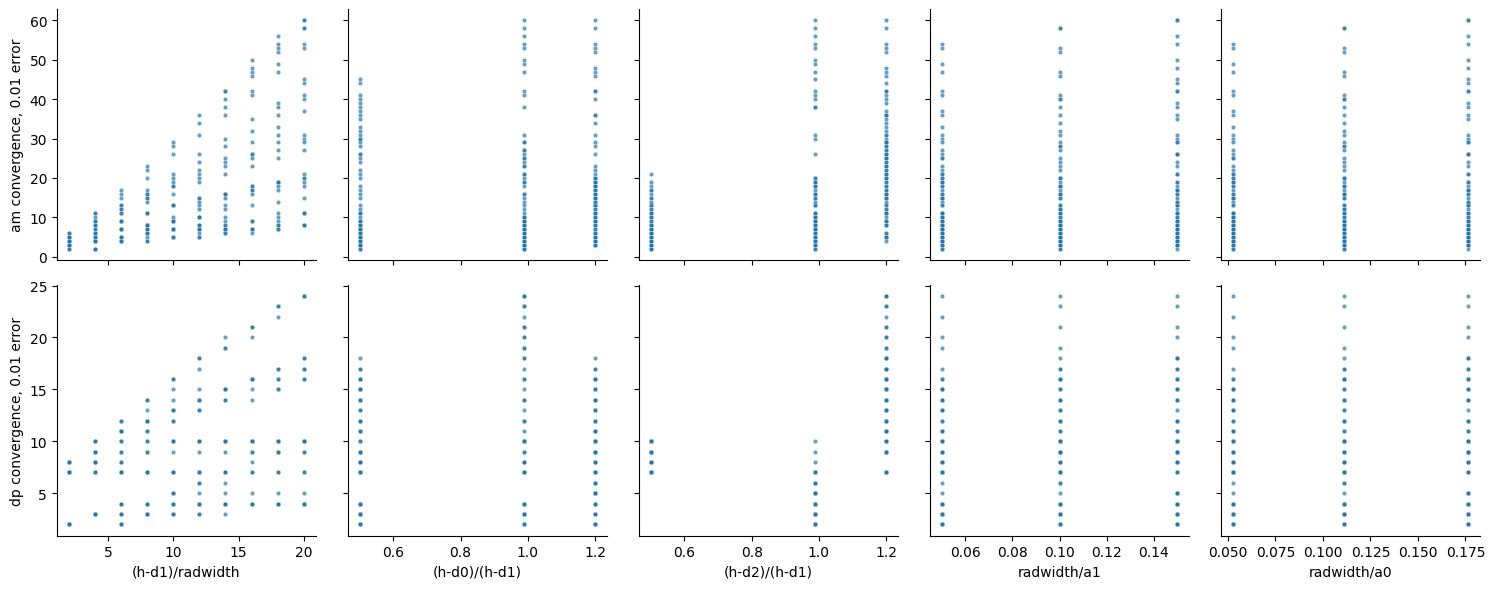

rad ratio


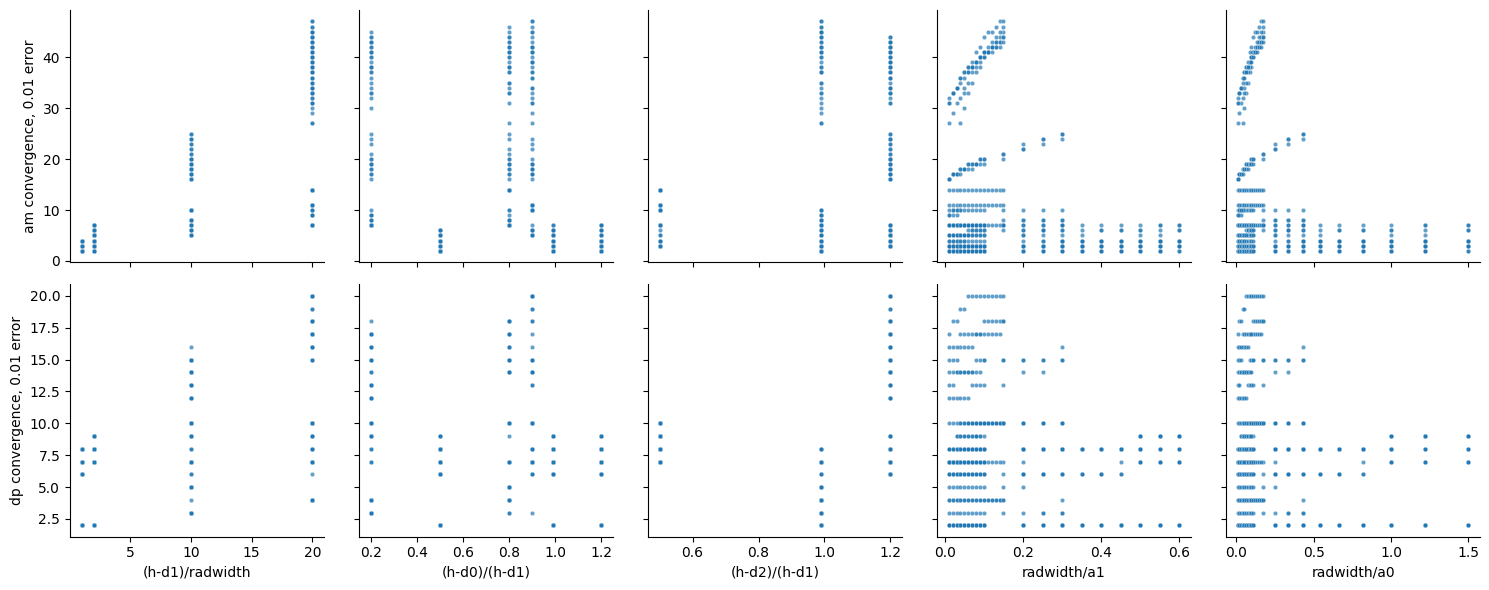

height ratios


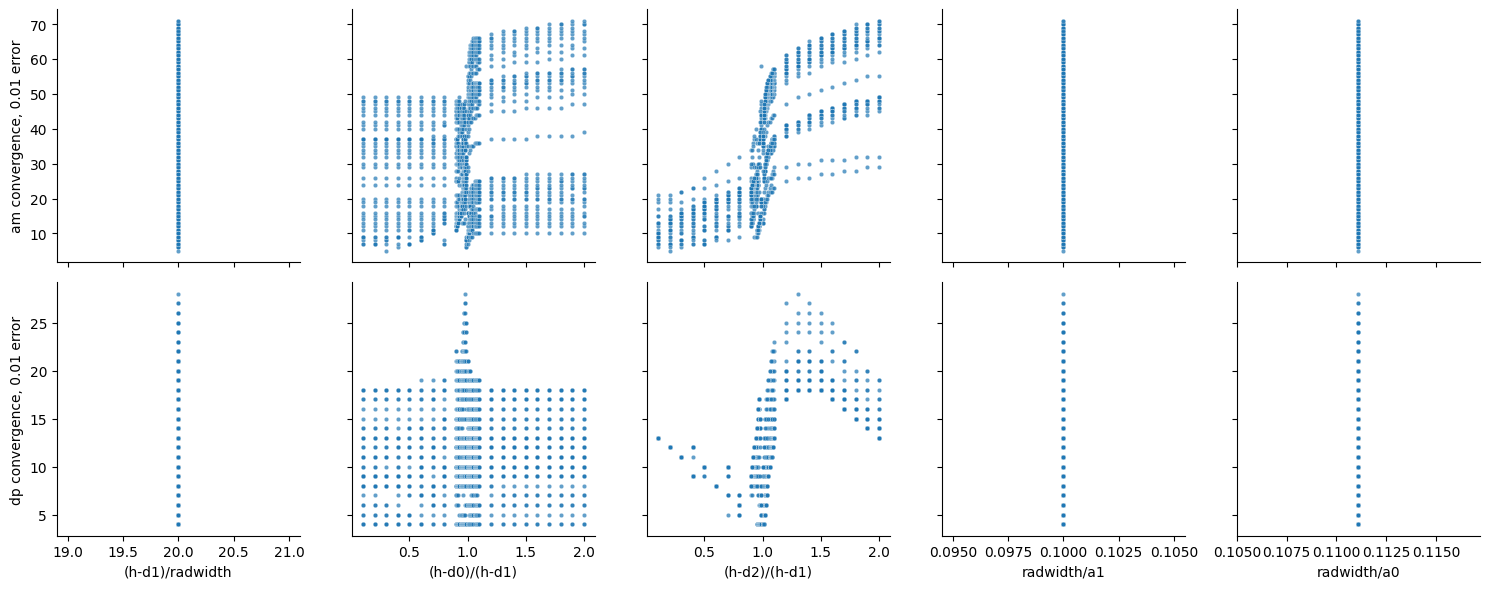

In [53]:
# Plot convergence point on y, various on x.
def xf1(config, m0):
  return (config["h"] - config["d"][1])/(config["a"][1] - config["a"][0])

def xf2(config, m0):
  return (config["h"] - config["d"][0])/(config["h"] - config["d"][1])

def xf3(config, m0):
  return (config["h"] - config["d"][2])/(config["h"] - config["d"][1])

def xf4(config, m0):
  return (config["a"][1] - config["a"][0])/(config["a"][1])

def xf5(config, m0):
  return (config["a"][1] - config["a"][0])/(config["a"][0])

def yf1(config, m0):
  return config[m0]["convergence point 0.01 am"]

def yf2(config, m0):
  return config[m0]["convergence point 0.005 am"]

def yf3(config, m0):
  return config[m0]["convergence point 0.01 dp"]

def yf4(config, m0):
  return config[m0]["convergence point 0.005 dp"]

x_funcs = {"(h-d1)/radwidth" : xf1,
           "(h-d0)/(h-d1)" : xf2,
           "(h-d2)/(h-d1)" : xf3,
           "radwidth/a1" : xf4,
           "radwidth/a0" : xf5}
y_funcs = {"am convergence, 0.01 error" : yf1,
          #  "am convergence, 0.005 error" : yf2,
           "dp convergence, 0.01 error" : yf3,
          #  "dp convergence, 0.005 error" : yf4
           }

for key in all_data.keys():
  print(key)
  plot_relation_grid(all_data[key], x_funcs, y_funcs)


In [54]:
# variable metrics
def h_minus_d_over_radwidth(data_dict):
    region = data_dict["region"]
    radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
    return (data_dict["h"] - data_dict["d"][region])/radwidth

def tall_theta(data_dict):
  hmdr = h_minus_d_over_radwidth(data_dict)
  return np.arctan(1/hmdr)

def right_ratio(data_dict):
  region = data_dict["region"]
  if region == (len(data_dict["d"]) - 1):
     return data_dict["h"]/(data_dict["h"] - data_dict["d"][region])
  else:
    return (data_dict["h"] - data_dict["d"][region + 1])/(data_dict["h"] - data_dict["d"][region])
    
def left_ratio(data_dict):
  region = data_dict["region"]
  if region == 0:
     return 0
  else:
    return (data_dict["h"] - data_dict["d"][region - 1])/(data_dict["h"] - data_dict["d"][region])
  
def rad_ratio(data_dict):
  region = data_dict["region"]
  radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
  return radwidth/data_dict["a"][region]

def restrict(all_data, f, val):
  return [data_dict for data_dict in all_data if (abs(f(data_dict) - val) < 0.001)]
# Use this function to extract a slice of the same parameter value to plot in 2D

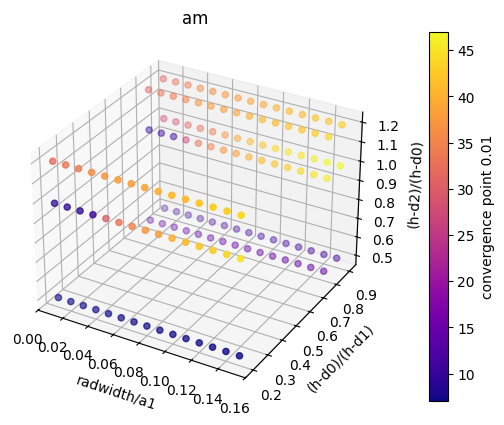

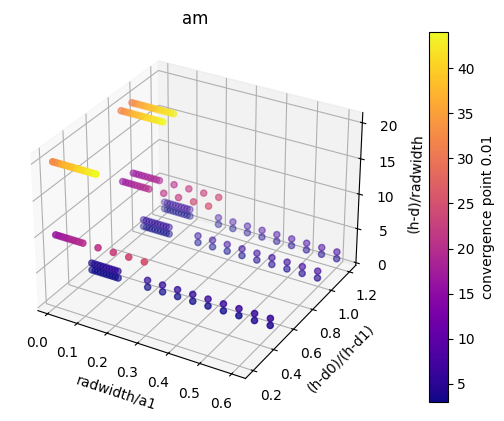

In [56]:
# subset = restrict(all_data['(h-d)/radwidth'], rad_ratio, 0.15)

# plot_hydros_against_3(subset, "am", 0.01,
#                       wrap_m0(h_minus_d_over_radwidth),
#                       wrap_m0(left_ratio), wrap_m0(right_ratio),
#                       "(h-d1)/radwidth", "(h-d0)/(h-d1)", "(h-d2)/(h-d0)")

subset = restrict(all_data['rad ratio'], h_minus_d_over_radwidth, 20)

plot_hydros_against_3(subset, "am", 0.01,
                      wrap_m0(rad_ratio),
                      wrap_m0(left_ratio), wrap_m0(right_ratio),
                      "radwidth/a1", "(h-d0)/(h-d1)", "(h-d2)/(h-d0)")

subset = restrict(all_data['rad ratio'], right_ratio, 1.2)
plot_hydros_against_3(subset, "am", 0.01,
                      wrap_m0(rad_ratio),
                      wrap_m0(left_ratio), wrap_m0(h_minus_d_over_radwidth),
                      "radwidth/a1", "(h-d0)/(h-d1)", "(h-d)/radwidth")

# rad ratio doesn't really scale dramatically if a high (h-d)/(radwidth) isn't there to scale up the "base" value

In [ ]:
def plot_left_and_hmdr(data, val, error = 0.01):
  data = restrict(data, right_ratio, val)
  plot_hydros_against_2(data, "am", error,
                        wrap_m0(left_ratio),
                        wrap_m0(h_minus_d_over_radwidth),
                        "(h-d0)/(h-d1)", "(h-d1)/radwidth")
  plot_hydros_against_2(data, "dp", error,
                        wrap_m0(left_ratio),
                        wrap_m0(h_minus_d_over_radwidth),
                        "(h-d0)/(h-d1)", "(h-d1)/radwidth")
  
def plot_right_and_hmdr(data, val, error = 0.01):
  data = restrict(data, left_ratio, val)
  plot_hydros_against_2(data, "am", error,
                        wrap_m0(right_ratio),
                        wrap_m0(h_minus_d_over_radwidth),
                        "(h-d2)/(h-d1)", "(h-d1)/radwidth")
  plot_hydros_against_2(data, "dp", error,
                        wrap_m0(right_ratio),
                        wrap_m0(h_minus_d_over_radwidth),
                        "(h-d2)/(h-d1)", "(h-d1)/radwidth")
  
def plot_left_and_right(data, error = 0.01):
  # data = restrict(data, h_minus_d_over_radwidth, val)
  plot_hydros_against_2(data, "am", error,
                        wrap_m0(left_ratio),
                        wrap_m0(right_ratio),
                        "(h-d0)/(h-d1)", "(h-d2)/(h-d1)")
  plot_hydros_against_2(data, "dp", error,
                        wrap_m0(left_ratio),
                        wrap_m0(right_ratio),
                        "(h-d0)/(h-d1)", "(h-d2)/(h-d1)")

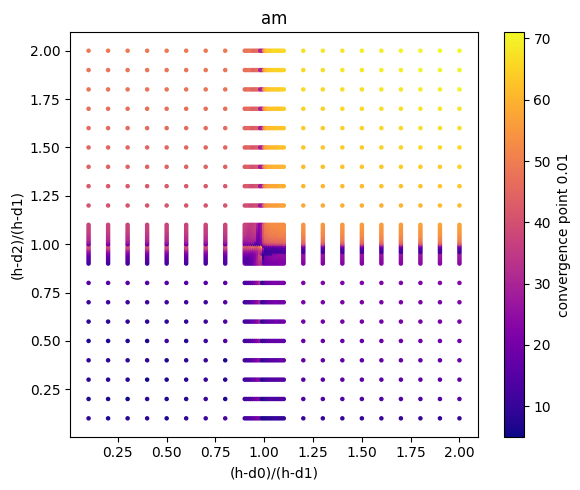

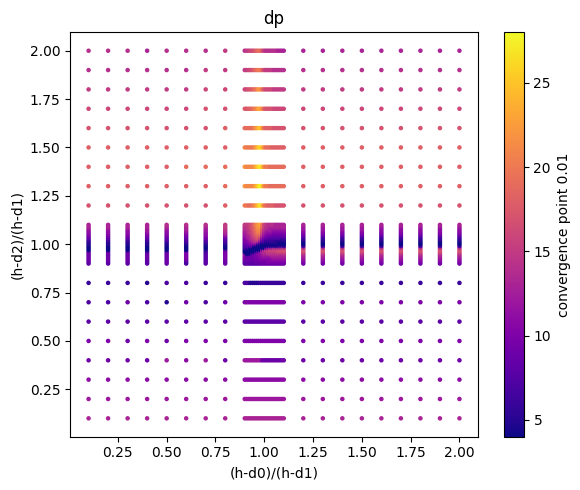

In [44]:
plot_left_and_right(all_data["height ratios"])

In [96]:
# Plot a single variable against the convergence point
# Connect points with the same other variables with the same color

variable_funcs = {"(h-d0)/(h-d1)" : left_ratio,
                  "(h-d2)/(h-d1)" : right_ratio,
                  "(h-d1)/radwidth" : h_minus_d_over_radwidth,
                  "radwidth/a1" : rad_ratio}

def subdivide_lst(data_lst, f, rtol = 0.01):
  group_dict = {}
  for data_dict in data_lst:
    val = f(data_dict)
    stored = False
    for key in group_dict.keys():
      if abs((val - key)/key) < rtol:
        group_dict[key].append(data_dict)
        stored = True
        break
    if not stored:
      group_dict[val] = [data_dict]
  return [group_dict[key] for key in group_dict.keys()] # turn dict into lst of lsts

def plot_wrt_one(data, hydro, error, scale = False, xlab = "Invalid Key", func_pack = None, show_labs = False):
  xfunc = variable_funcs[xlab]
  other_funcs = variable_funcs.copy()
  del other_funcs[xlab]

  key1, key2, key3 = other_funcs.keys()
  subdivision1 = subdivide_lst(data, other_funcs[key1])
  subdivision2 = [entry for sublist in subdivision1 for entry in subdivide_lst(sublist, other_funcs[key2])]
  subdivision3 = [entry for sublist in subdivision2 for entry in subdivide_lst(sublist, other_funcs[key3])]
  # subdivision3 should be a list of lists of data_dicts, with uniform values across the three keys

  line_count = len(subdivision3)
  for lst in subdivision3:
    lst.sort(key = xfunc)
  
  if func_pack is not None: # Plotting a prediction on the x-axis instead
    entry_func = func_pack["function"]
    xlab = func_pack["xlab"]
  else:
    entry_func = xfunc

  colors = [cm.get_cmap('viridis')(i/(line_count - 1)) for i in range(line_count)]
  
  fig, ax = plt.subplots()
  for idx, data_lst in enumerate(subdivision3):
    xs = [entry_func(data_dict) for data_dict in data_lst]
    ys = [data_dict[data_dict["m0s"][0]][f"convergence point {error:.2g} " + hydro] for data_dict in data_lst]
    vs = [other_funcs[key](data_lst[0]) for key in other_funcs.keys()]
    lab = key1 + f"= {vs[0]:.2g}, " + key2 + f" = {vs[1]:.2g}, " + key3 + f" = {vs[2]:.2g}"
    if scale:
      ys = scale_by(ys, ys[0])
    plt.plot(xs, ys, color = colors[idx], label = lab)
  

  ax.set_xlabel(xlab)
  if scale:
    ylab = "Ratio of NMK at convergence to that for 1st config"
  else:
    ylab = "NMK at convergence"
  if show_labs:
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  ax.set_ylabel(ylab)
  ax.set_title(hydro + " convergence wrt " + xlab)
  plt.show()

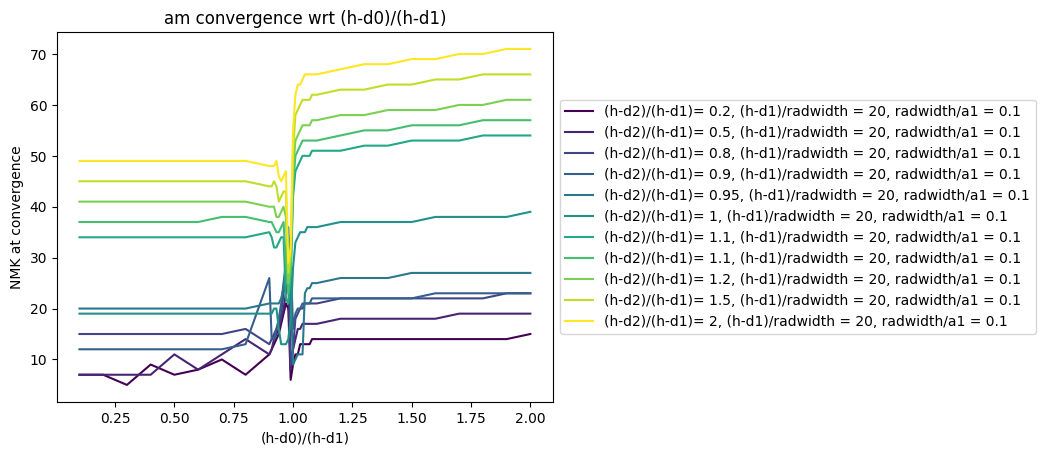

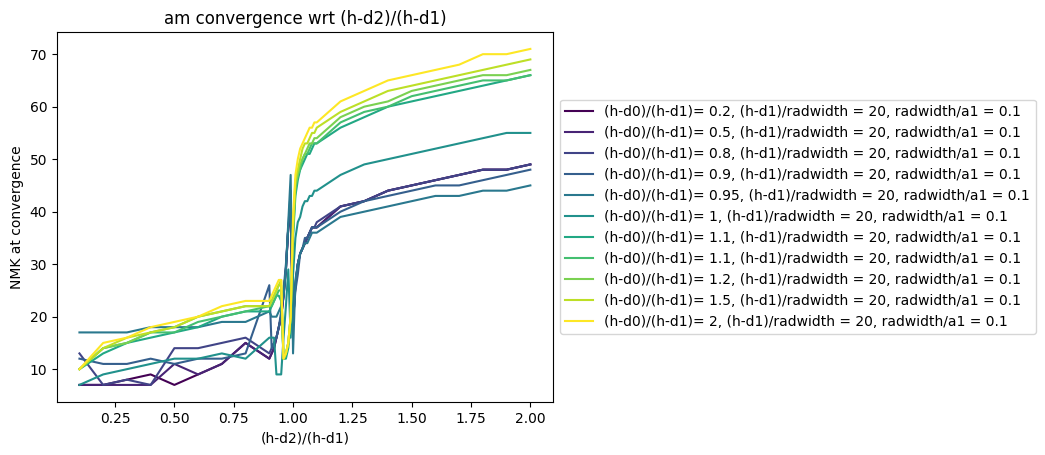

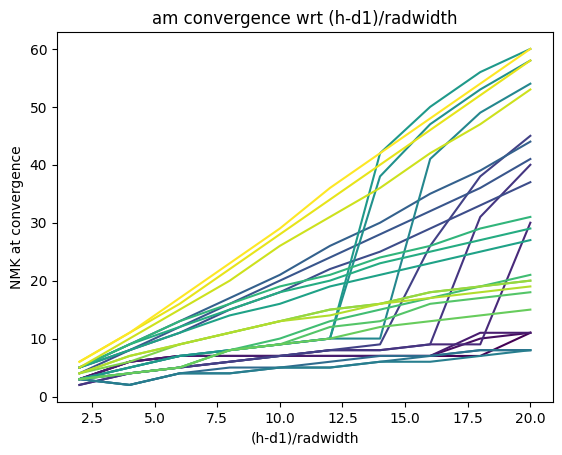

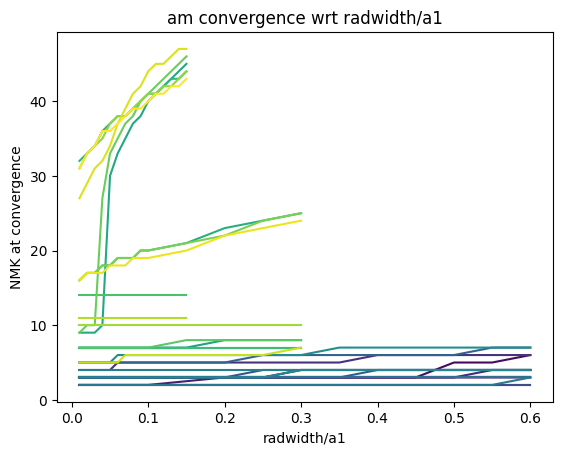

In [97]:
selected_height_ratios = [0.2, 0.5, 0.8, 0.9, 0.95, 1, 1.05, 1.1, 1.2, 1.5, 2]
subsets = [restrict(all_data["height ratios"], right_ratio, val) for val in selected_height_ratios]
subset = [entry for sublst in subsets for entry in sublst]
plot_wrt_one(subset, "am", 0.01, xlab = "(h-d0)/(h-d1)", show_labs=True)

subsets = [restrict(all_data["height ratios"], left_ratio, val) for val in selected_height_ratios]
subset = [entry for sublst in subsets for entry in sublst]
plot_wrt_one(subset, "am", 0.01, xlab = "(h-d2)/(h-d1)", show_labs=True)

plot_wrt_one(all_data["(h-d)/radwidth"], "am", 0.01, xlab = "(h-d1)/radwidth")
plot_wrt_one(all_data["rad ratio"], "am", 0.01, xlab = "radwidth/a1")

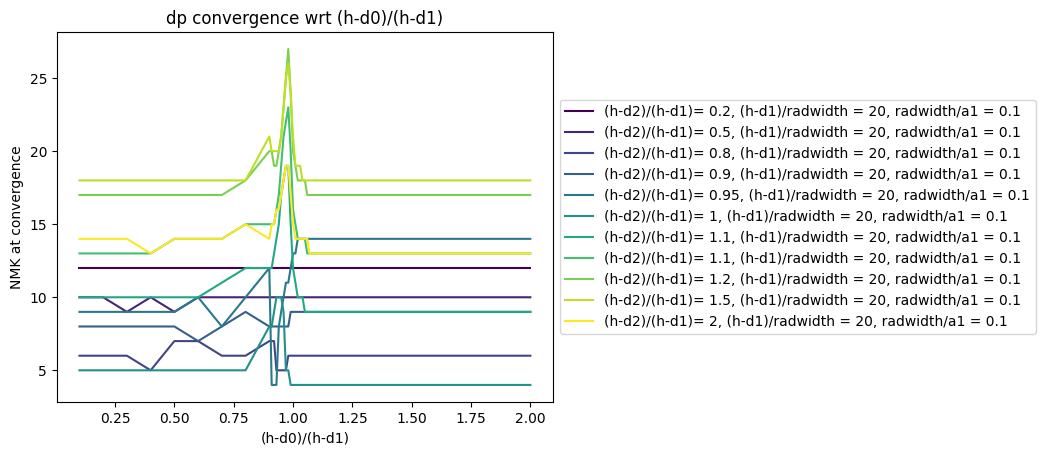

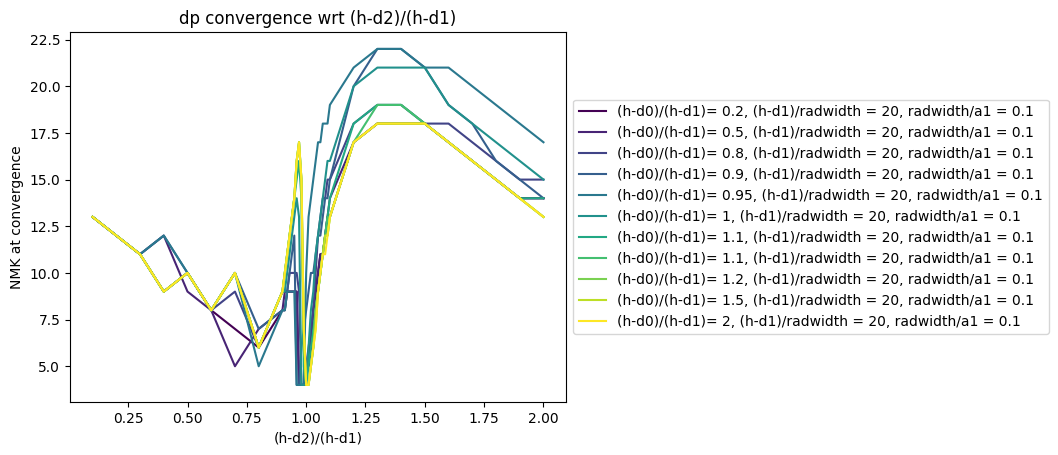

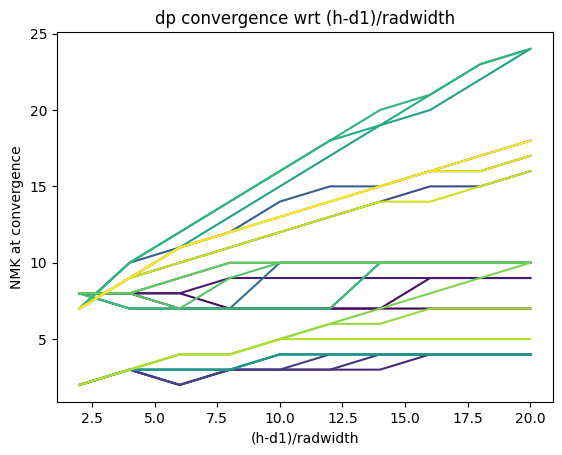

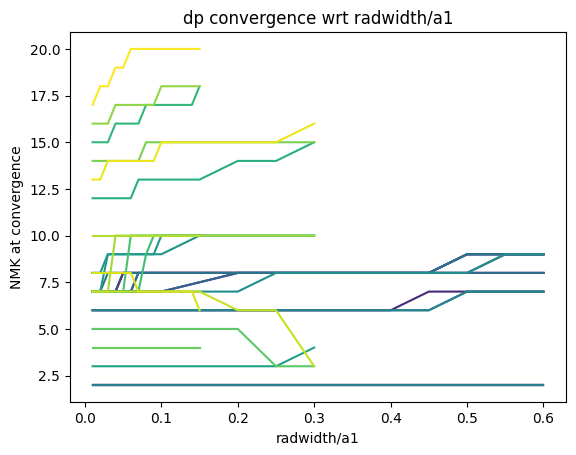

In [98]:
selected_height_ratios = [0.2, 0.5, 0.8, 0.9, 0.95, 1, 1.05, 1.1, 1.2, 1.5, 2]
subsets = [restrict(all_data["height ratios"], right_ratio, val) for val in selected_height_ratios]
subset = [entry for sublst in subsets for entry in sublst]
plot_wrt_one(subset, "dp", 0.01, xlab = "(h-d0)/(h-d1)", show_labs=True)

subsets = [restrict(all_data["height ratios"], left_ratio, val) for val in selected_height_ratios]
subset = [entry for sublst in subsets for entry in sublst]
plot_wrt_one(subset, "dp", 0.01, xlab = "(h-d2)/(h-d1)", show_labs=True)

plot_wrt_one(all_data["(h-d)/radwidth"], "dp", 0.01, xlab = "(h-d1)/radwidth")
plot_wrt_one(all_data["rad ratio"], "dp", 0.01, xlab = "radwidth/a1")

In [ ]:
# Fix the (h-d)/radwidth, because that behavior appears monotonic.
# Vary the (h-d0)/(h-d1) and (h-d2)/(h-d1) ratios to get a better idea of what they look like.